# Detailed exploratory data analysis with python

Reference Source: TUATINI GODARD · 6Y AGO · 302,487 VIEWS

Copy & Edit

1162
gold medal

Link: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python/notebook

# Case Study: Customer Analysis Study [LAB] Week 2, Day 3

## Exploratory data analysis (EDA)
The purpose of this EDA is to find insights which will serve us later in another notebook for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm. We will proceed as follow:

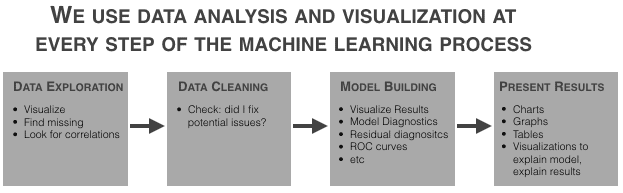

In [1]:
from  IPython.display import Image
Image("http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png")

# Activites List
It is highly encouraged to work in a group of two students for the lab of this case study.
Important: for Activity 3 and Activity 4 , please use the file Data_Marketing_Customer_Analysis_Round3.csv from the Data folder.
## Activity 3 (Wednesday)
- Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

## Activity 3 (Wednesday)
- Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
import missingno as msno
import plotly
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [3]:
file = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
colFile = file.columns.tolist()
print(colFile)
file.head(10)

['region', 'customer_lifetime_value', 'response', 'coverage', 'education', 'effective_to_date', 'month', 'employment_status', 'gender', 'income', 'location_code', 'marital_status', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size']


region  customer_lifetime_value response  coverage  \
0      central                     4809       no     basic   
1  west region                     2228       no     basic   
2         east                    14947       no     basic   
3   north west                    22332      yes  extended   
4   north west                     9025       no   premium   
5  west region                     4745      yes     basic   
6  west region                     5035       no     basic   
7  west region                     4956       no     basic   
8  west region                     5989      yes   premium   
9   north west                    17114       no  extended   

              education effective_to_date month employment_status gender  \
0               college           2/18/11   feb          employed      m   
1               college           1/18/11   jan        unemployed      f   
2              bachelor           2/10/11   feb          employed      m   
3               college           1/11/11   jan          employed      m   
4              bachelor           1/17/11   jan     medical leave      f   
5  high school or below           2/14/11   feb          employed      m   
6                doctor           2/14/11   feb          employed      f   
7  high school or below           2/24/11   feb          employed      m   
8               college           1/19/11   jan          employed      m   
9                master            1/4/11   jan          employed      f   

   income  ... months_since_policy_inception number_of_open_complaints  \
0   48029  ...                            52                         0   
1   92260  ...                            26                         0   
2   22139  ...                            31                         0   
3   49078  ...                             3                         0   
4   23675  ...                            31                         0   
5   50549  ...                            73                         0   
6   37405  ...                            99                         3   
7   87197  ...                            45                         0   
8   66839  ...                            24                         0   
9   70961  ...                             8                         0   

   number_of_policies     policy_type        policy  renew_offer_type  \
0                   9  corporate auto  corporate l3            offer3   
1                   1   personal auto   personal l3            offer4   
2                   2   personal auto   personal l3            offer3   
3                   2  corporate auto  corporate l3            offer2   
4                   7   personal auto   personal l2            offer1   
5                   7   personal auto   personal l3            offer1   
6                   4  corporate auto  corporate l2            offer2   
7                   3   personal auto   personal l2            offer2   
8                   1   personal auto   personal l1            offer2   
9                   2  corporate auto  corporate l3            offer2   

   sales_channel total_claim_amount  vehicle_class vehicle_size  
0          agent                292  four-door car      medsize  
1    call center                744  four-door car      medsize  
2    call center                480            suv      medsize  
3         branch                484  four-door car      medsize  
4         branch                707  four-door car      medsize  
5          agent                292  four-door car      medsize  
6         branch                287  four-door car      medsize  
7         branch                247   two-door car      medsize  
8         branch                739     sports car      medsize  
9          agent                408  four-door car        small  

[10 rows x 24 columns]

In [4]:
#check the data file for NaN count and datatypes
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

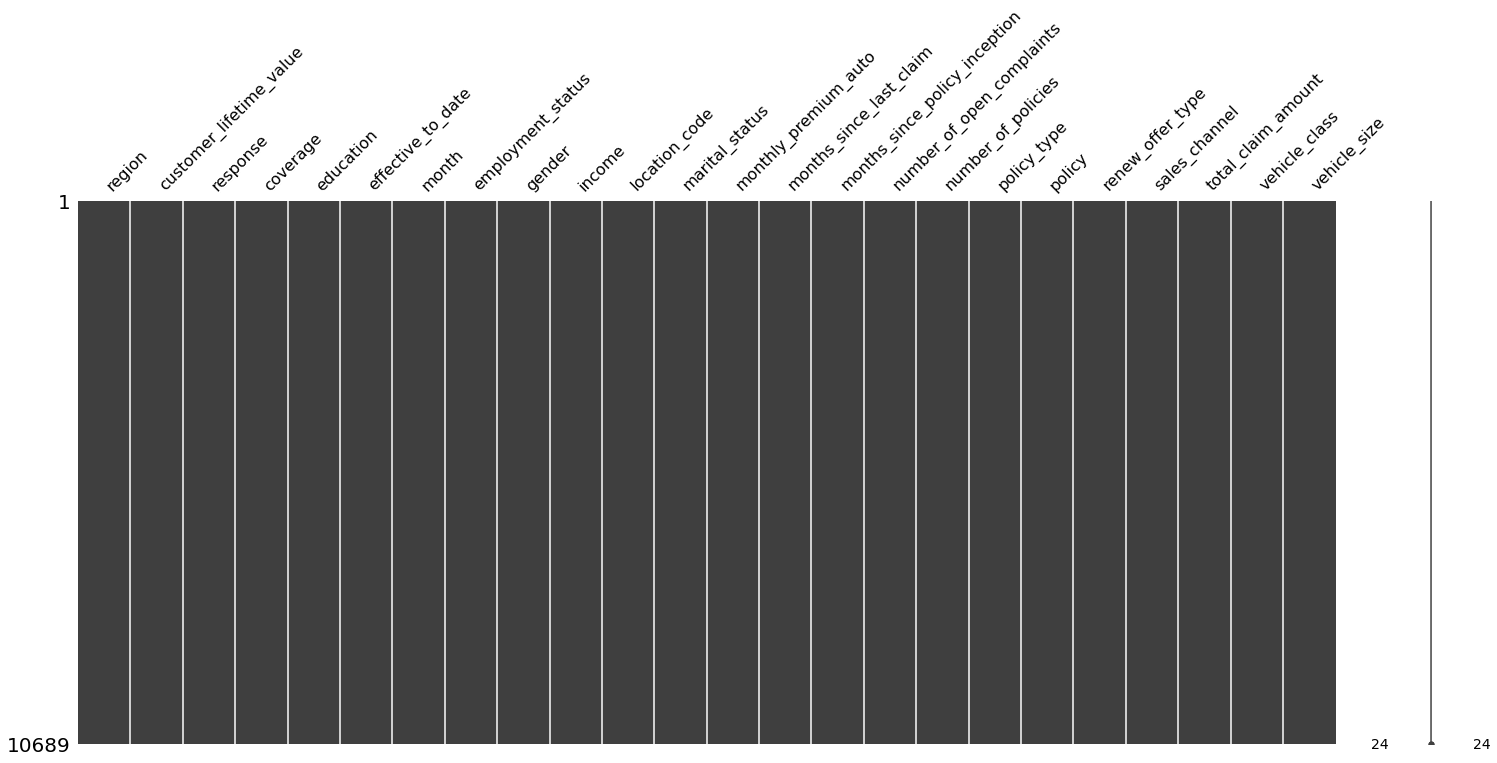

In [5]:
#This plot indicates missing values
msno.matrix(file)

**ANALYSIS TAKE-AWAY:** The file for the customer insurance first party data has no missing values.

In [6]:
#Check unique values of file
for i in colFile:
    print(file[i].unique())
#unique values look good!

['central' 'west region' 'east' 'north west']
[ 4809  2228 14947 ... 19228 23893 11971]
['no' 'yes']
['basic' 'extended' 'premium']
['college' 'bachelor' 'high school or below' 'doctor' 'master']
['2/18/11' '1/18/11' '2/10/11' '1/11/11' '1/17/11' '2/14/11' '2/24/11'
 '1/19/11' '1/4/11' '1/2/11' '2/7/11' '1/31/11' '1/26/11' '2/28/11'
 '1/16/11' '2/26/11' '2/23/11' '1/15/11' '2/2/11' '2/15/11' '1/24/11'
 '2/21/11' '2/22/11' '1/7/11' '1/28/11' '2/8/11' '2/12/11' '2/20/11'
 '1/5/11' '2/19/11' '1/3/11' '2/3/11' '1/22/11' '1/23/11' '2/5/11'
 '2/13/11' '1/25/11' '2/16/11' '2/1/11' '1/27/11' '1/12/11' '1/20/11'
 '2/6/11' '2/11/11' '1/21/11' '1/29/11' '1/9/11' '2/9/11' '2/27/11'
 '1/1/11' '2/17/11' '2/25/11' '1/13/11' '1/6/11' '2/4/11' '1/14/11'
 '1/10/11' '1/8/11' '1/30/11']
['feb' 'jan']
['employed' 'unemployed' 'medical leave' 'disabled' 'retired']
['m' 'f']
[48029 92260 22139 ... 39837 64195 68942]
['suburban' 'urban' 'rural']
['married' 'single' 'divorced']
[ 61  64 100  97 117  63 154  85

The unique values looking good! There are no apparent issues with the data.

### Now lets see how the data is distributed
Focusing on target variables customer lifetime value and total claim amount

count    10689.000000
mean      8011.906727
std       6877.557889
min       1898.000000
25%       4014.000000
50%       5776.000000
75%       8991.000000
max      83325.000000
Name: customer_lifetime_value, dtype: float64


<Figure size 648x576 with 0 Axes>

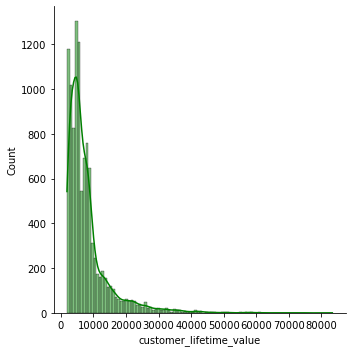

In [7]:
print(file['customer_lifetime_value'].describe())
plt.figure(figsize=(9, 8))
sns.displot(file['customer_lifetime_value'], color='g', bins=100, kde=True)

In [8]:
#plt.figure(figsize=(100, 80))
#sns.displot(file, x="income", hue="coverage")

count    10689.000000
mean       434.227243
std        292.550878
min          0.000000
25%        269.000000
50%        383.000000
75%        547.000000
max       2893.000000
Name: total_claim_amount, dtype: float64


<Figure size 648x576 with 0 Axes>

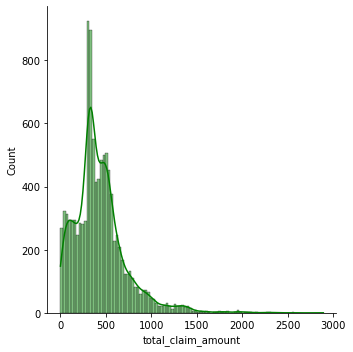

In [9]:
#Now lets see how the data is distributed
print(file['total_claim_amount'].describe())
plt.figure(figsize=(9, 8))
sns.displot(file['total_claim_amount'], color='g', bins=100, kde=True)

In [10]:
#Get only numerical values from file
numerical = file.select_dtypes(include = ['float64','int64'])
numerical.head()

customer_lifetime_value  income  monthly_premium_auto  \
0                     4809   48029                    61   
1                     2228   92260                    64   
2                    14947   22139                   100   
3                    22332   49078                    97   
4                     9025   23675                   117   

   months_since_last_claim  months_since_policy_inception  \
0                        7                             52   
1                        3                             26   
2                       34                             31   
3                       10                              3   
4                       33                             31   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   9                 292  
1                          0                   1                 744  
2                          0                   2                 480  
3                          0                   2                 484  
4                          0                   7                 707

### Distribution plots for the numerical variables

In [11]:
col_numericals = numerical.columns.tolist()

### Use seaborn library to construct distribution plots for the numerical variables

<Figure size 3600x2160 with 0 Axes>

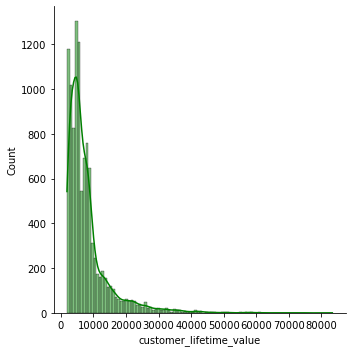

<Figure size 3600x2160 with 0 Axes>

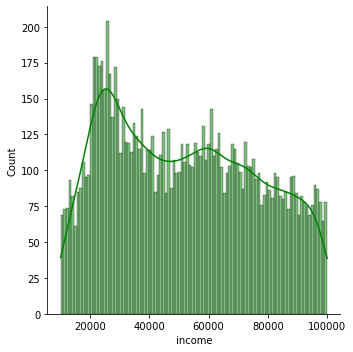

<Figure size 3600x2160 with 0 Axes>

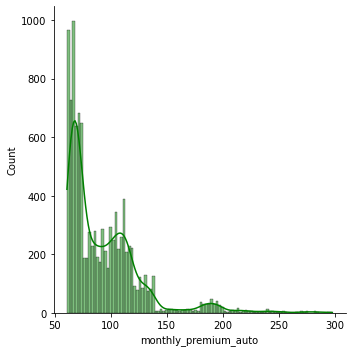

<Figure size 3600x2160 with 0 Axes>

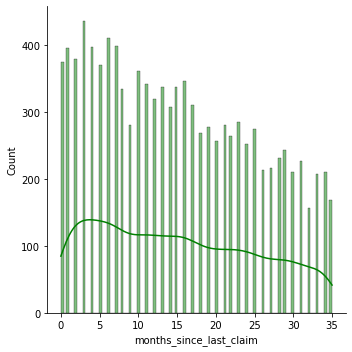

<Figure size 3600x2160 with 0 Axes>

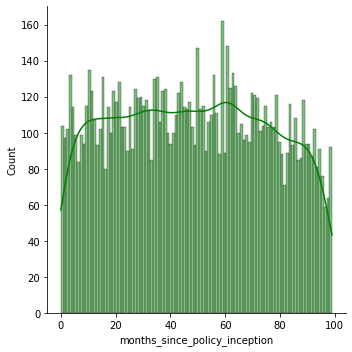

<Figure size 3600x2160 with 0 Axes>

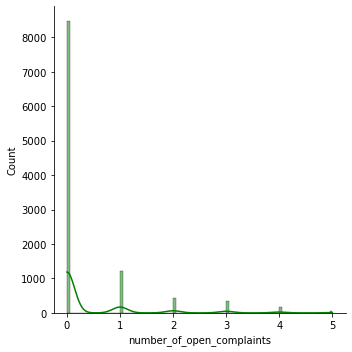

<Figure size 3600x2160 with 0 Axes>

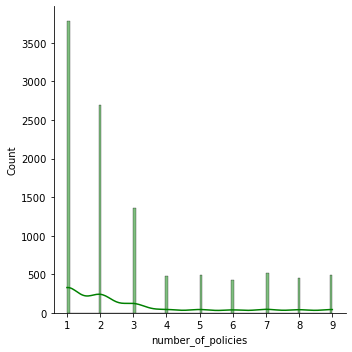

<Figure size 3600x2160 with 0 Axes>

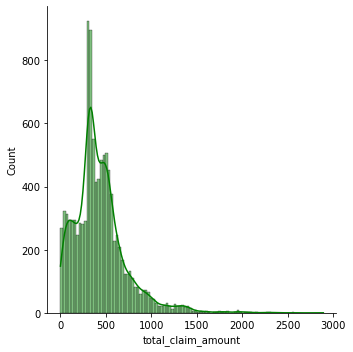

In [12]:
#Now lets see how the all numericals are distributed
for i in numerical:
    plt.figure(figsize=(50, 30))
    sns.displot(file[i], color='g', bins=100, kde=True);

In [13]:
#Get only categorical values from file
categorical = file.select_dtypes(include = ['object'])
categorical.head()

region response  coverage education effective_to_date month  \
0      central       no     basic   college           2/18/11   feb   
1  west region       no     basic   college           1/18/11   jan   
2         east       no     basic  bachelor           2/10/11   feb   
3   north west      yes  extended   college           1/11/11   jan   
4   north west       no   premium  bachelor           1/17/11   jan   

  employment_status gender location_code marital_status     policy_type  \
0          employed      m      suburban        married  corporate auto   
1        unemployed      f      suburban         single   personal auto   
2          employed      m      suburban         single   personal auto   
3          employed      m      suburban         single  corporate auto   
4     medical leave      f      suburban        married   personal auto   

         policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0  corporate l3           offer3         agent  four-door car      medsize  
1   personal l3           offer4   call center  four-door car      medsize  
2   personal l3           offer3   call center            suv      medsize  
3  corporate l3           offer2        branch  four-door car      medsize  
4   personal l2           offer1        branch  four-door car      medsize

## Activity 3 (Wednesday)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution

### Numerical data distribution
For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [14]:
#check again the numerical and categorical dataframes
print(list(set(numerical.dtypes.tolist())))
print(list(set(categorical.dtypes.tolist())))

[dtype('int64')]
[dtype('O')]


Now lets plot them all:

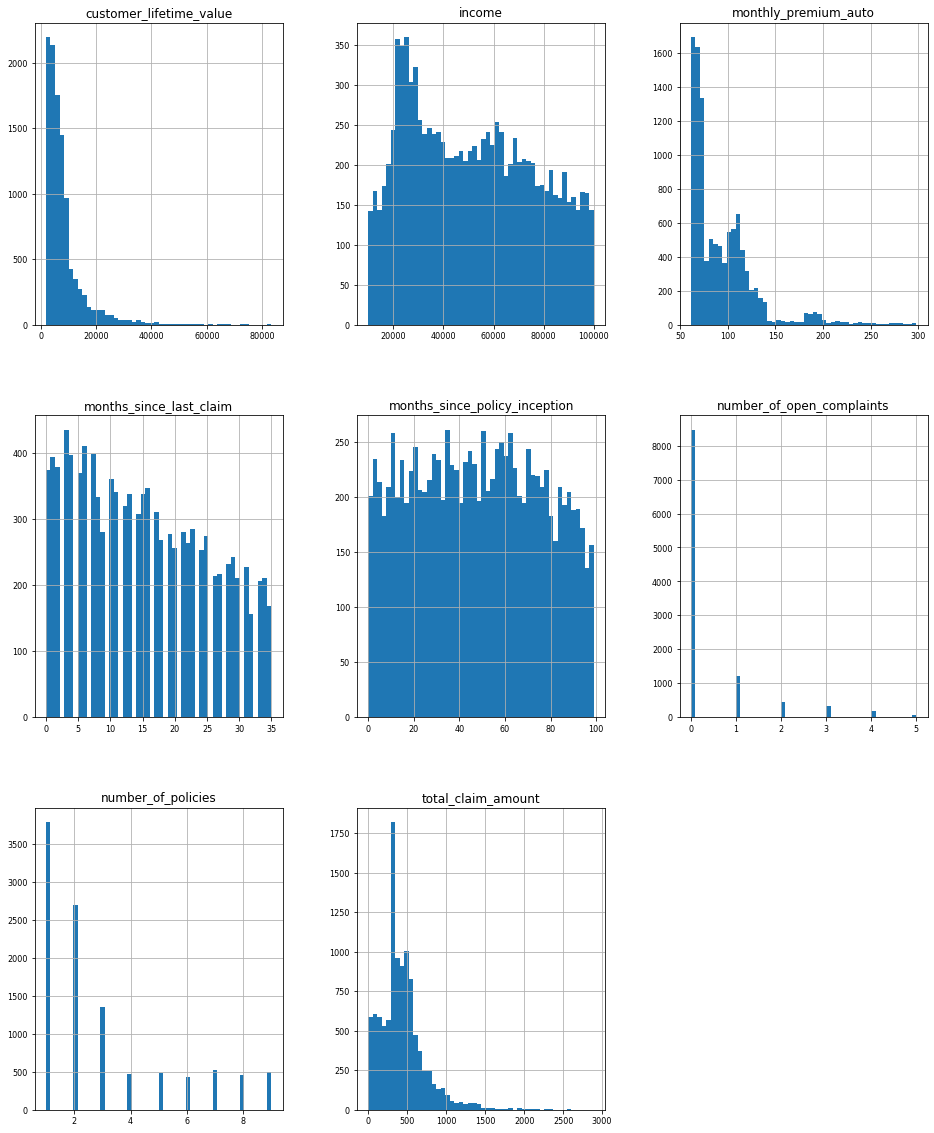

In [15]:
numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

The feature `income` shows most clients seem to be between 20.000 - 40.000 USD. Features distributions seem to `customer lifetime value` and `monthly premium auto` as well as `total claim value` and `monthly premium auto` seem to sahre similar distribution.

### Use Matplotlib to construct histograms

In [16]:
#assessing equal bin size with ((max(numerical)-min(numerical)/833.5 a.k.a.(100 step size))

#look at all max observation in numerical
print(np.max(numerical['customer_lifetime_value']))

83325


In [17]:
#look at all min observation in numerical
print(np.min(numerical['customer_lifetime_value']))

1898


In [18]:
#look at size of customer_lifetime_value feature in numerical - in order to implement in fct
print(len(numerical.value_counts('customer_lifetime_value')))

5676


In [19]:
#look at size of income feature in numerical - in order to implement in fct
print(len(numerical.value_counts('income')))

8210


In [20]:
#implement fct to create equal bins of 100 for histograms
def bin_equal(df):
    eq_bin_100 = int((int((np.max(df)-np.min(df))))/int((len(numerical.value_counts(df)))))*10
    return(eq_bin_100)

bin_equal(numerical['customer_lifetime_value'])

140

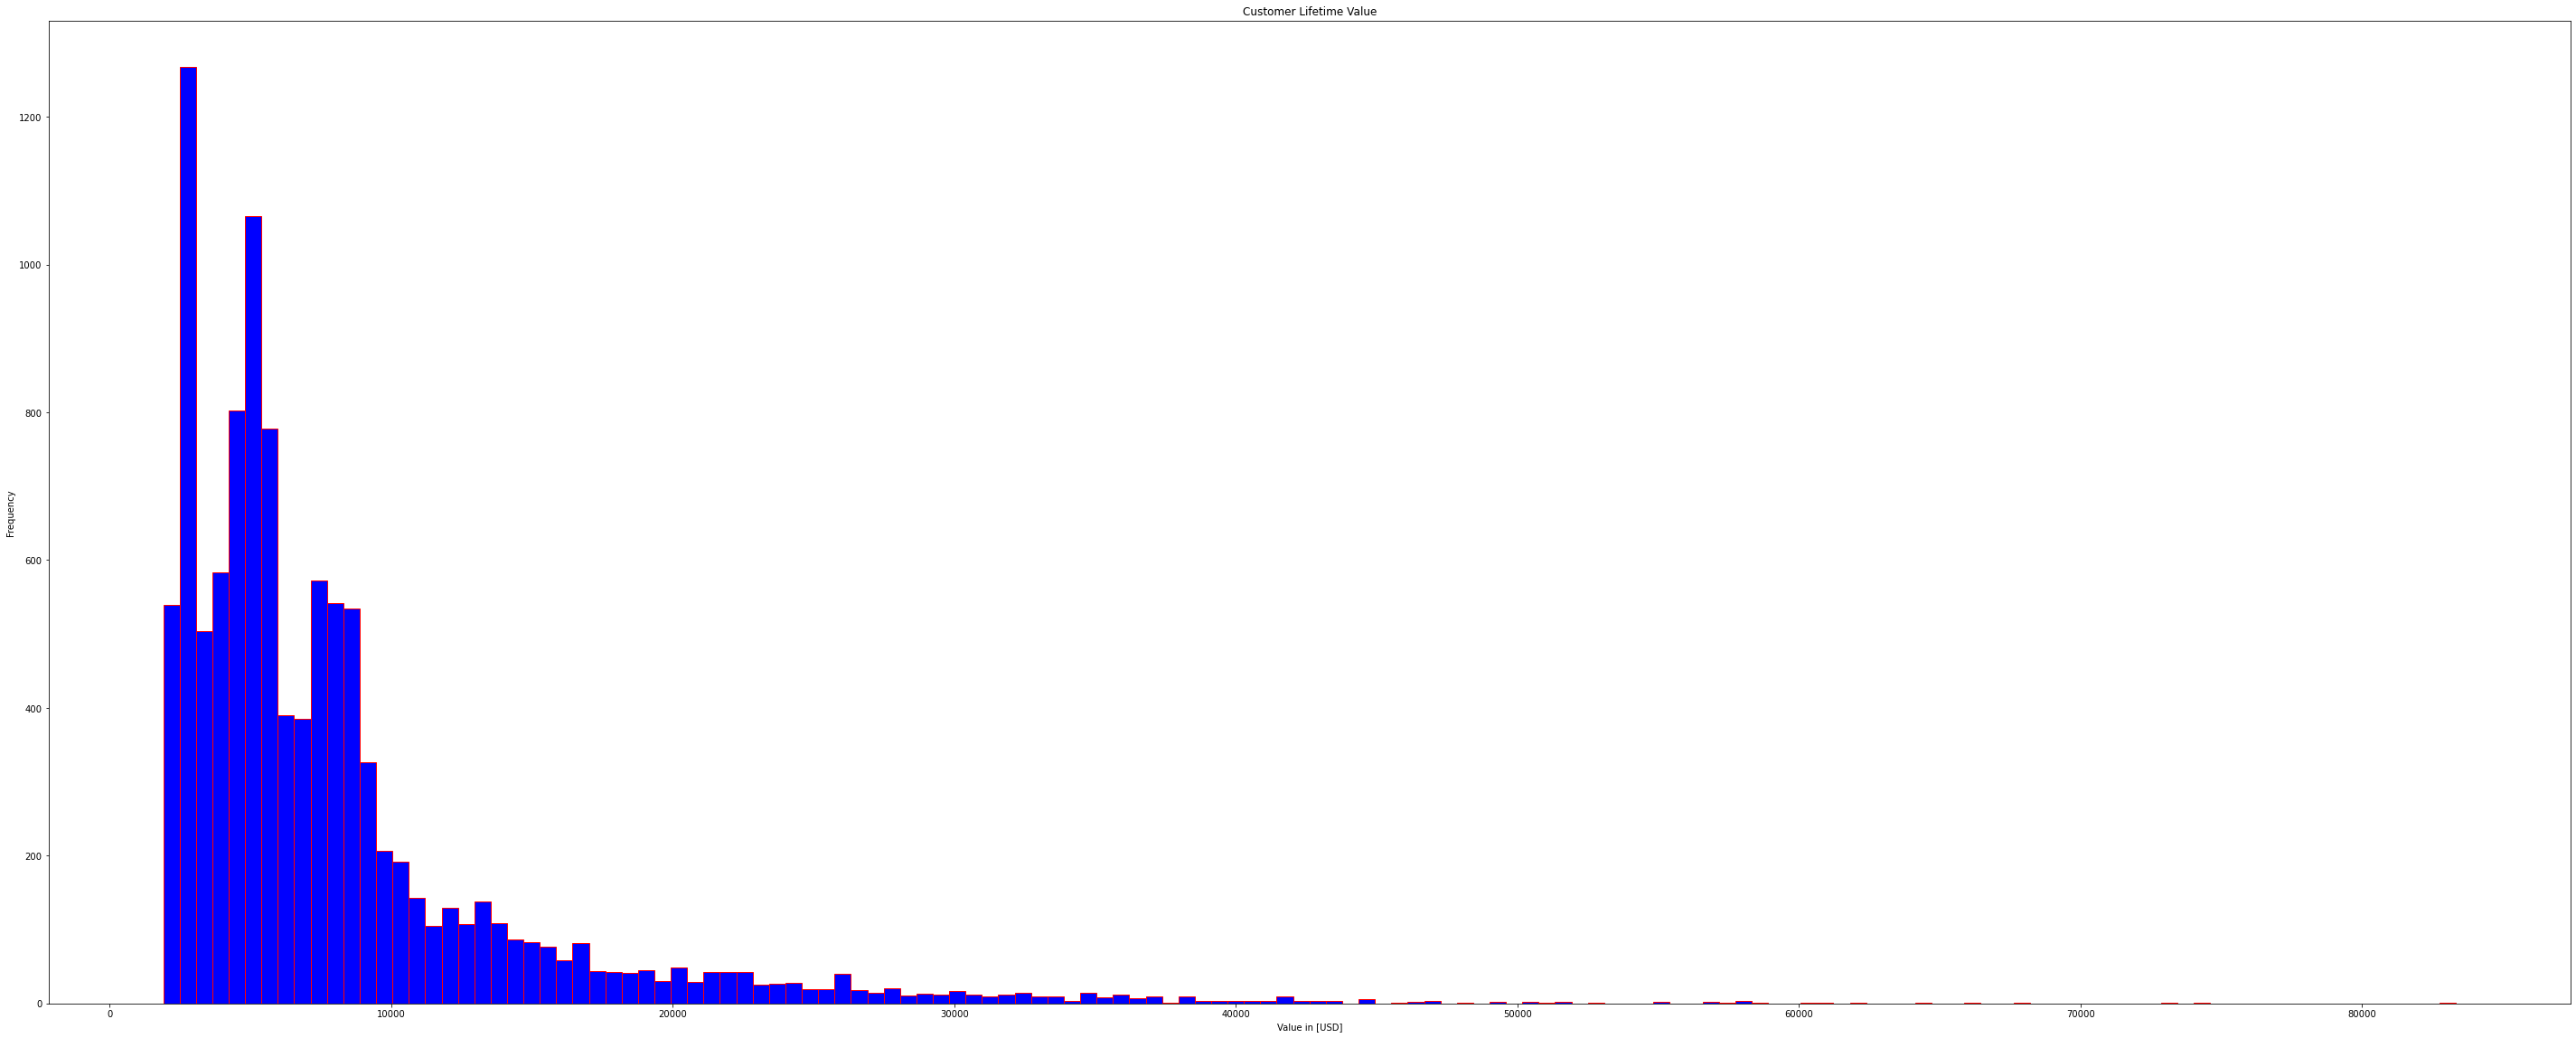

In [21]:
# Creating histogram
# Customer Lifetime Value
fig, ax = plt.subplots(1, 1,figsize=(50,20))
plt.hist(numerical['customer_lifetime_value'], bins=bin_equal(numerical['customer_lifetime_value']), 

         edgecolor="red", color="blue") 

## Set title
ax.set_title("Customer Lifetime Value")
  
# adding labels
ax.set_xlabel('Value in [USD]')
ax.set_ylabel('Frequency')
  
#Show plot
plt.show()


In [22]:
#Example Automatic binning of matlibplot

# Creating histogram
# Customer Lifetime Value
#fig, ax = plt.subplots(1, 1,figsize=(50,20))
#plt.hist(numerical['customer_lifetime_value'], 

#         edgecolor="red", color="blue") 

## Set title
#ax.set_title("Customer Lifetime Value")
  
# adding labels
#ax.set_xlabel('Value in [USD]')
#ax.set_ylabel('Frequency')
  
#Show plot
#plt.show()

In [23]:
#Example 14 size binning of matlibplot

# Creating histogram
# Customer Lifetime Value
#fig, ax = plt.subplots(1, 1,figsize=(50,20))
#plt.hist(numerical['customer_lifetime_value'], bins=14, 

#         edgecolor="red", color="blue") 

## Set title
#ax.set_title("Customer Lifetime Value")
  
# adding labels
#ax.set_xlabel('Value in [USD]')
#ax.set_ylabel('Frequency')
  
#Show plot
#plt.show()

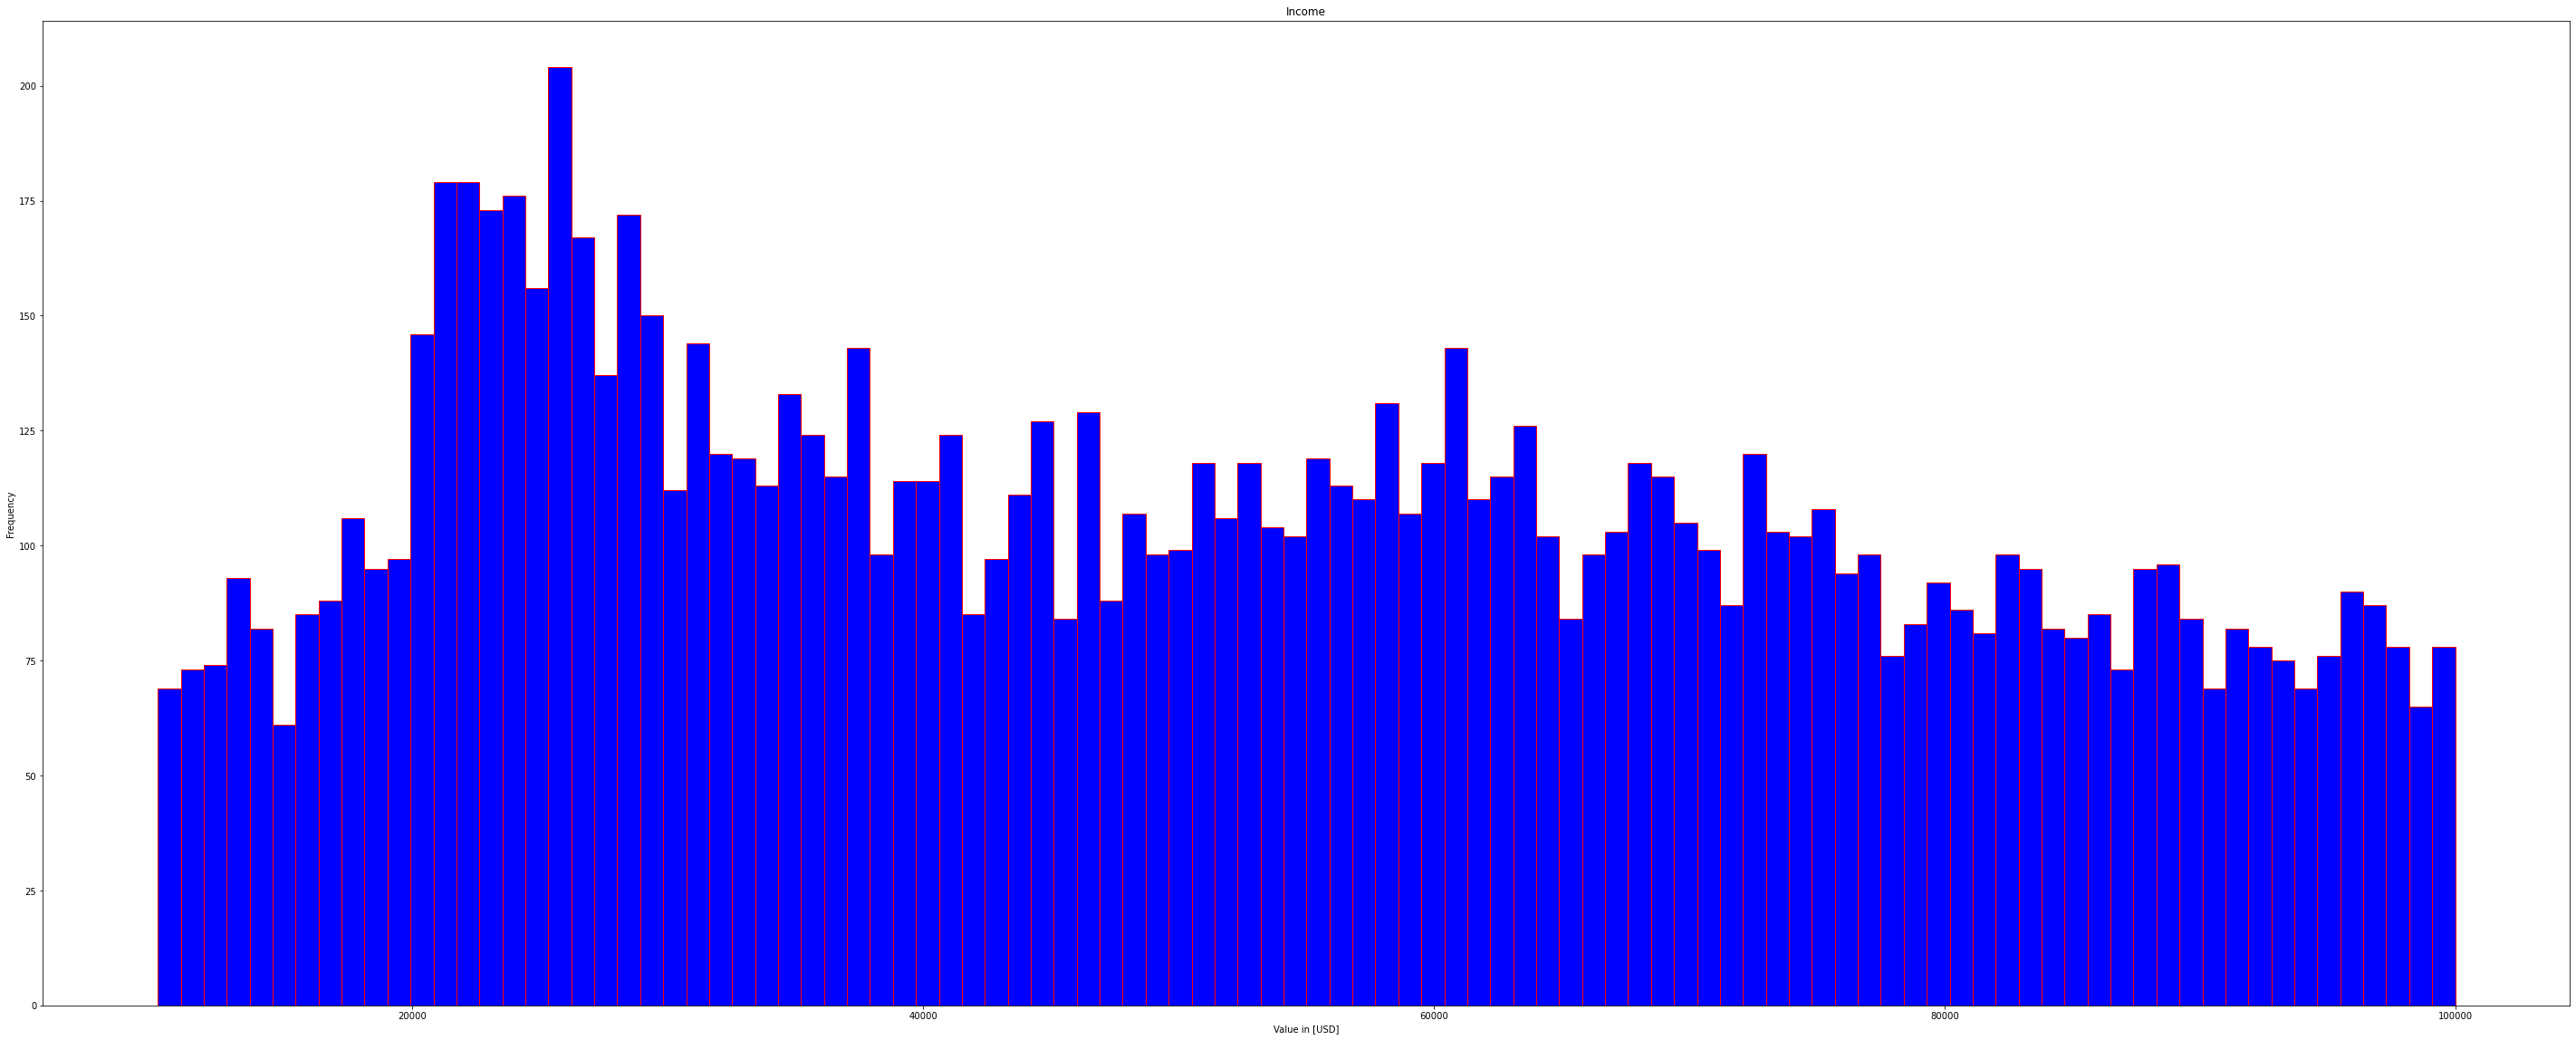

In [24]:
# Creating histogram
# Income
fig, ax = plt.subplots(1, 1,figsize=(50,20))
plt.hist(numerical['income'], bins=bin_equal(numerical['income']), 

         edgecolor="red", color="blue") 

## Set title
ax.set_title("Income")
  
# adding labels
ax.set_xlabel('Value in [USD]')
ax.set_ylabel('Frequency')
  
#Show plot
plt.show()

### Do the distributions for different numerical variables look like a normal distribution

<Figure size 5760x3600 with 0 Axes>

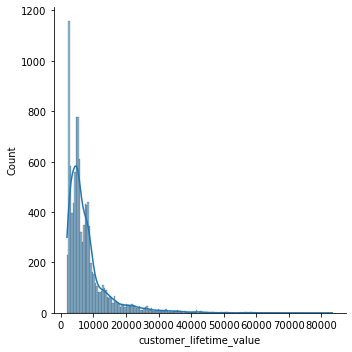

In [25]:
#Normally distributed feature customer lifetime value
plt.figure(figsize=(80, 50))
sns.displot(numerical["customer_lifetime_value"], kde=True)

<Figure size 5760x3600 with 0 Axes>

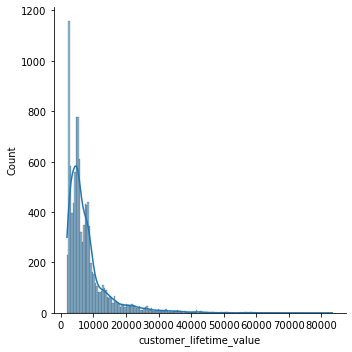

<Figure size 5760x3600 with 0 Axes>

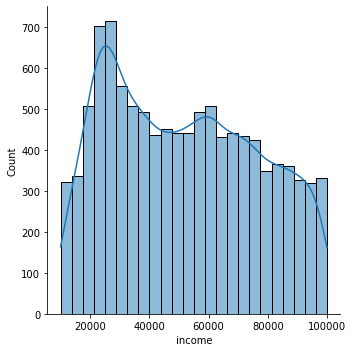

<Figure size 5760x3600 with 0 Axes>

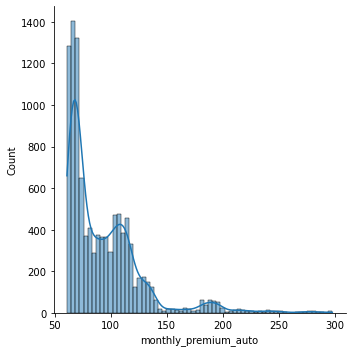

<Figure size 5760x3600 with 0 Axes>

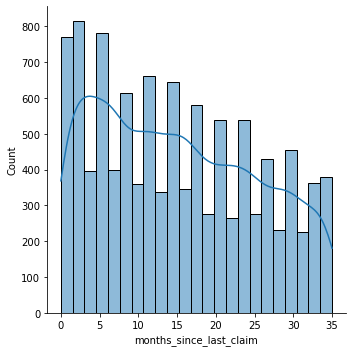

<Figure size 5760x3600 with 0 Axes>

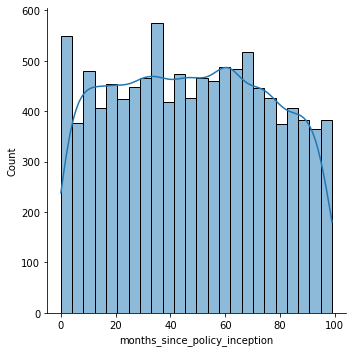

<Figure size 5760x3600 with 0 Axes>

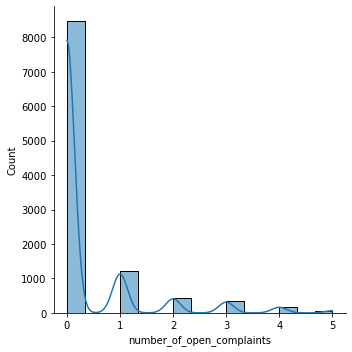

<Figure size 5760x3600 with 0 Axes>

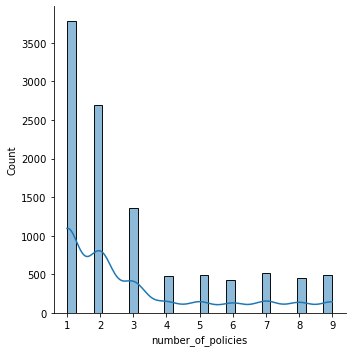

<Figure size 5760x3600 with 0 Axes>

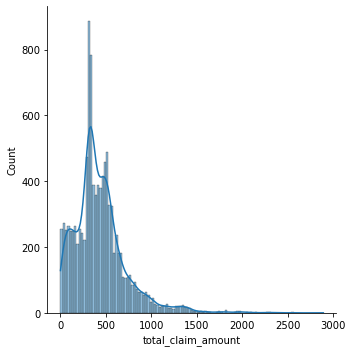

In [26]:
#Plots of all normally distributed numerical features in file
for i in col_numericals:
    plt.figure(figsize=(80, 50))
    sns.displot(numerical[i], kde=True)

<Figure size 7200x5760 with 0 Axes>

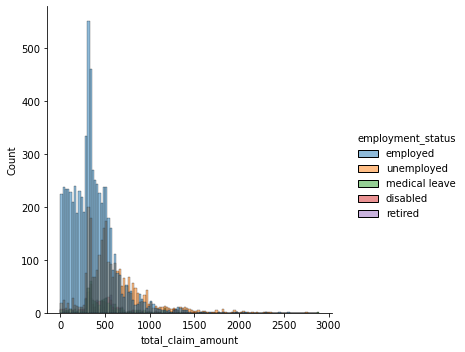

In [27]:
#Test to use hue as extra measure to display the employment status in the normal distributed customer lifetime value
plt.figure(figsize=(100, 80))
sns.displot(file, x="total_claim_amount", hue="employment_status")

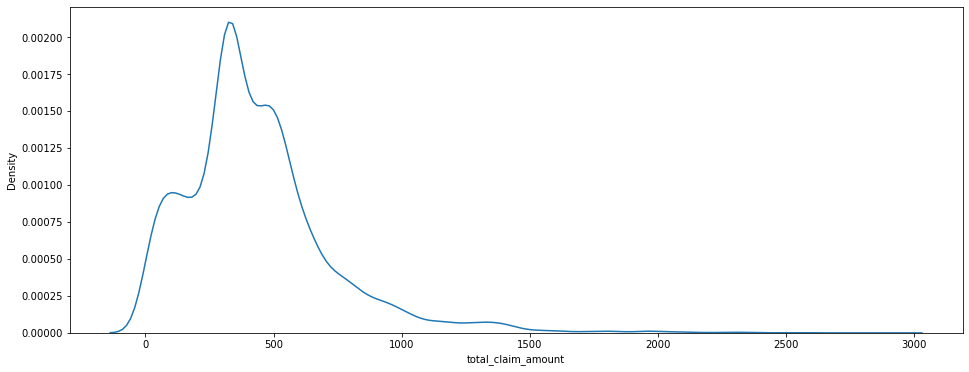

In [28]:
#for further analysis multiple numerical features are displayed in distribution kde plot

# type 1 : default view
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(file['total_claim_amount'])
plt.show()

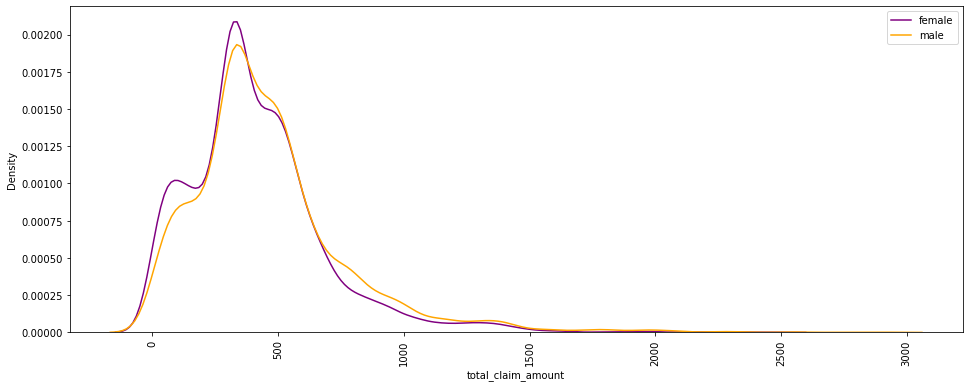

In [29]:
# type 2 : draw 2 graph with label
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(file[file['gender']=='f']['total_claim_amount'], color='purple', ax=ax, label='female')
sns.kdeplot(file[file['gender']=='m']['total_claim_amount'], color='orange', ax=ax, label='male')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Total Claim Amount - Gender
## How much do Women or Men claim on average? 
## Who claims on average more?

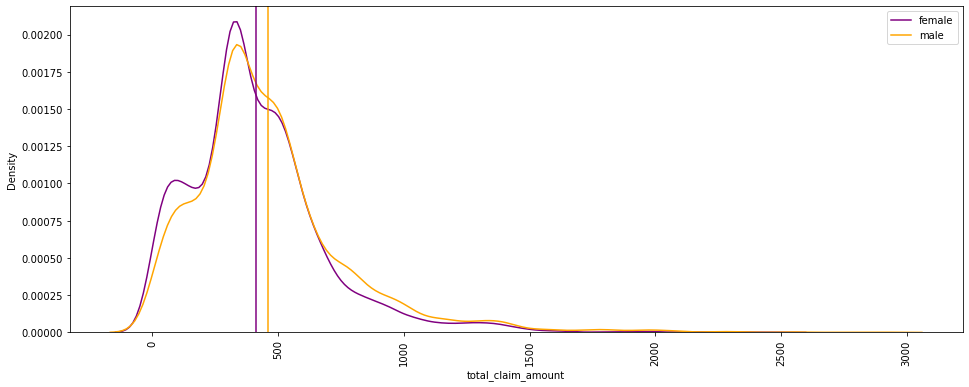

In [30]:
# type 3 : add avg line
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(file[file['gender']=='f']['total_claim_amount'], color='purple', ax=ax, label='female')
sns.kdeplot(file[file['gender']=='m']['total_claim_amount'], color='orange', ax=ax, label='male')

# avg line
plt.axvline(file[file['gender']=='f']['total_claim_amount'].mean(), color='purple')
plt.axvline(file[file['gender']=='m']['total_claim_amount'].mean(), color='orange')

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

**ANALYSIS TAKE-AWAY:** The averages in the normal distribution of the total claim amount in the category gender shows that male have on average a higher total claim amount than women.

# Total Claim Amount - Employment
## A person with which employment status claims the most on average? 

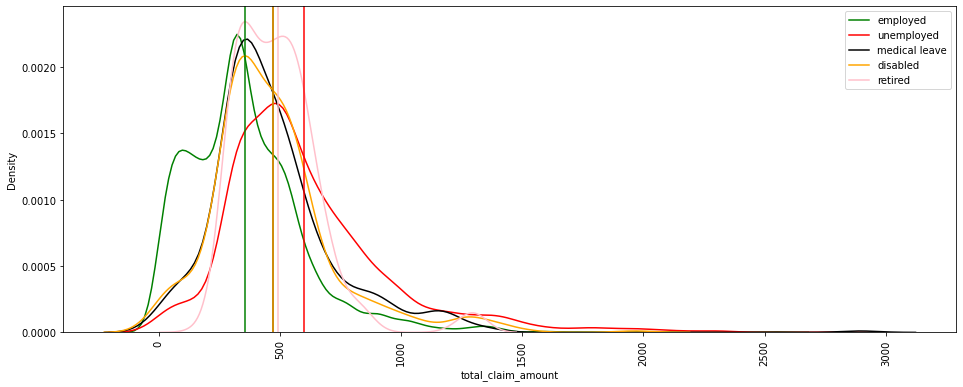

In [31]:
# type 3 : add avg line
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(file[file['employment_status']=='employed']['total_claim_amount'], color='green', ax=ax, label='employed')
sns.kdeplot(file[file['employment_status']=='unemployed']['total_claim_amount'], color='red', ax=ax, label='unemployed')
sns.kdeplot(file[file['employment_status']=='medical leave']['total_claim_amount'], color='black', ax=ax, label='medical leave')
sns.kdeplot(file[file['employment_status']=='disabled']['total_claim_amount'], color='orange', ax=ax, label='disabled')
sns.kdeplot(file[file['employment_status']=='retired']['total_claim_amount'], color='pink', ax=ax, label='retired')

###WORK MORE
# avg line
plt.axvline(file[file['employment_status']=='employed']['total_claim_amount'].mean(), color='green')
plt.axvline(file[file['employment_status']=='unemployed']['total_claim_amount'].mean(), color='red')
plt.axvline(file[file['employment_status']=='medical leave']['total_claim_amount'].mean(), color='black')
plt.axvline(file[file['employment_status']=='disabled']['total_claim_amount'].mean(), color='orange')
plt.axvline(file[file['employment_status']=='retired']['total_claim_amount'].mean(), color='pink')

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

**ANALYSIS TAKE-AWAY:** The averages in the normal distribution of the total claim amount in the category employment shows that unemployed have on average the highest total claim amount. The lowest total claim amount is by employed people.

In [32]:
#get the unique value in category
#file["employment_status"].unique()

# Total Claim Amount - ###### DO ALL CAT
## A person with w********status claims the most on average? 

**Above sns.kdeplots were produced as a reference to:**
Source: https://www.kaggle.com/code/subinium/basic-of-statistical-viz-plotly-seaborn/notebook#Distplot
Credit to: subinium

Subin An
Kaggle Grandmaster

Seoul, Seoul, South Korea

HCI Lab

### Correlation Numerical
Now we'll try to find which features are strongly correlated with customer lifetime value and with total claim amount. We'll store them in a var called golden_features_list. We'll reuse our numerical dataset to do so.

In [33]:
numerical_corr = numerical.corr()['customer_lifetime_value'][:-22] # -22 because the second feature is customer lifetime value
golden_features_list = numerical_corr[abs(numerical_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Customer Lifetime Value:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with Customer Lifetime Value:
Series([], Name: customer_lifetime_value, dtype: float64)


In [34]:
numerical_corr = numerical.corr()['total_claim_amount'][:-3] # -3 because the feature total claim amount is 3rd lsat feature
golden_features_list = numerical_corr[abs(numerical_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Customer Lifetime Value:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Customer Lifetime Value:
monthly_premium_auto    0.630149
Name: total_claim_amount, dtype: float64


## Activity 3 (Wednesday)
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

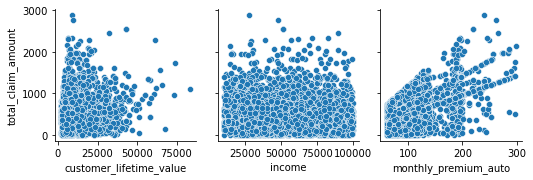

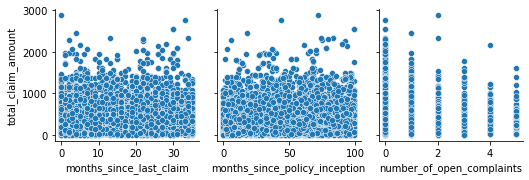

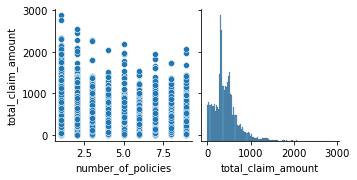

In [35]:
#Search in a pairplot for visual correlation
#The pair plot confirms that monthly premium auto has positive correlation of >0.5
for i in range(0, len(numerical.columns), 3):
    sns.pairplot(data=numerical,
                 x_vars=numerical.columns[i:i+3],
                 y_vars=['total_claim_amount'])

We can clearly identify some relationships.`total claim amount` and `monthly premium auto` share a linear relationship. All other features are not correlated with `total claim amount`.

`customer lifetime value` shares no correlation with any feature in the dataset.

# Conclusion
By looking at correlation between numerical values we discovered 1 feature which have a strong relationship to a `total claim amount`. Besides correlation we didn't find any notable pattern on the datas which are not correlated.

## Activity 3 (Wednesday)
- Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

## Feature to feature relationship
We can try to see if some variables are linked between each other and then explain their relation with common sense.

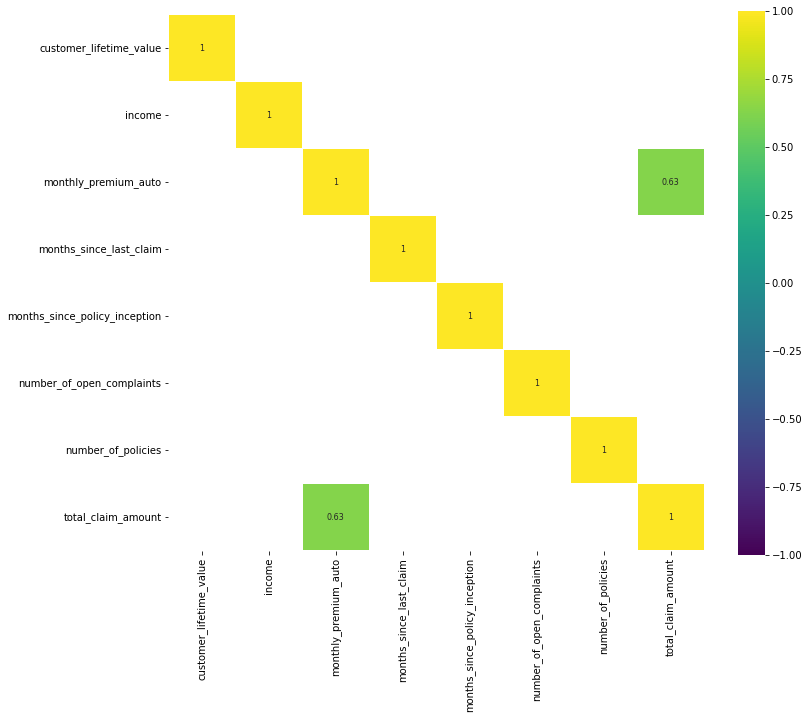

In [36]:
#Heatmap with feature-feature correlations  -> correlation between total claim amount and monthly premium auto again validated
corr = numerical.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

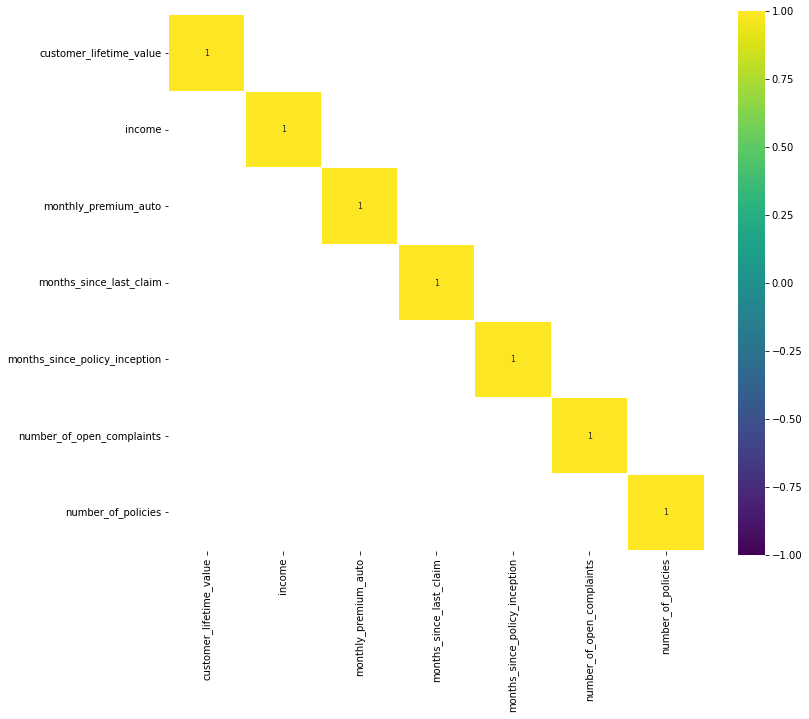

In [37]:
#Heatmap with feature-feature correlations -> as above no other feature is correlated with oneanother
corr = numerical.drop('total_claim_amount', axis=1).corr() # We already examined total_claim_amount correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Q -> Q (Quantitative to Quantitative relationship)
Let's now examine the quantitative features of our dataframe and how they relate to the total_claim_amount which is also quantitative (hence the relation Q -> Q).

Some of the features of our dataset are categorical. To separate the categorical from quantitative features lets use common sense:

In [38]:
#have a look again at original file and its feature lables
#file.head(10)
#colFile

In [39]:
#picking quantitative (non categorical and non numerical) features from file
quantitative_features_list = ['customer_lifetime_value', 'income','monthly_premium_auto','months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints',
    'number_of_policies','total_claim_amount']
file_quantitative_values = file[quantitative_features_list]
file_quantitative_values.head()

customer_lifetime_value  income  monthly_premium_auto  \
0                     4809   48029                    61   
1                     2228   92260                    64   
2                    14947   22139                   100   
3                    22332   49078                    97   
4                     9025   23675                   117   

   months_since_last_claim  months_since_policy_inception  \
0                        7                             52   
1                        3                             26   
2                       34                             31   
3                       10                              3   
4                       33                             31   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   9                 292  
1                          0                   1                 744  
2                          0                   2                 480  
3                          0                   2                 484  
4                          0                   7                 707

Still, we have a lot of features to analyse here so let's take the strongly correlated quantitative features from this dataset and analyse them one by one:

In [40]:
#features are picked which have high (>0.5) correlation with target variable total_claim_amount
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('total_claim_amount')
features_to_analyse

['monthly_premium_auto', 'total_claim_amount']

Let's look at their distribution and linear fit.

In [41]:
# Creating train and test dataset from numerical
train=numerical.sample(frac=0.8,random_state=200) #random state is a seed value
test=numerical.drop(train.index)

>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
...
>>> min_max_scaler = preprocessing.MinMaxScaler()
>>> X_train_minmax = min_max_scaler.fit_transform(X_train)
>>> X_train_minmax
array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])
       
Source: https://scikit-learn.org/stable/modules/preprocessing.html

In [42]:
min_max_scaler = preprocessing.MinMaxScaler() 
train_minmax = min_max_scaler.fit_transform(train) 
train_minmax

array([[0.02096356, 0.03515521, 0.1350211 , ..., 0.        , 0.        ,
        0.20117525],
       [0.01779508, 0.3013097 , 0.10126582, ..., 0.        , 0.        ,
        0.21154511],
       [0.05743795, 0.00533665, 0.13080169, ..., 0.        , 0.25      ,
        0.15243692],
       ...,
       [0.1519889 , 0.30422263, 0.09704641, ..., 0.        , 0.125     ,
        0.20877981],
       [0.19478797, 0.38657387, 0.00843882, ..., 0.        , 0.125     ,
        0.22848254],
       [0.12201113, 0.07243396, 0.17721519, ..., 0.        , 0.125     ,
        0.170757  ]])

In [43]:
#Define X, the target variable total claim amount and y the feature to analyse the linear relationship with X
x = numerical['total_claim_amount']
x=x.array.reshape(-1, 1)
y = numerical['monthly_premium_auto']
y=y.array.reshape(-1, 1)

#Fit beta (slope) and alpha(intersect), the parameters for optimal (check score; also compare other models and corss evaluate model bag) fit and prediction/ estimation power.
reg = LinearRegression().fit(x,y)
print('The intercept of this linear model is: ', reg.intercept_)
print('The regression coefficient of this linear model is: ', reg.coef_)
print('The regression score of this linear model is: ', reg.score(x,y))
print('A regression prediction with monthly premium auto of 3 of this linear model is: ',reg.predict(np.array([[3]])))

The intercept of this linear model is:  [61.00304085]
The regression coefficient of this linear model is:  [[0.07412514]]
The regression score of this linear model is:  0.39708728876772104
A regression prediction with monthly premium auto of 3 of this linear model is:  [[61.22541627]]


**ANALYSIS TAKE-AWAY:** The regression score for the linear regression model is 0.4, which is poor. Recommendation: Find another better fitting model.

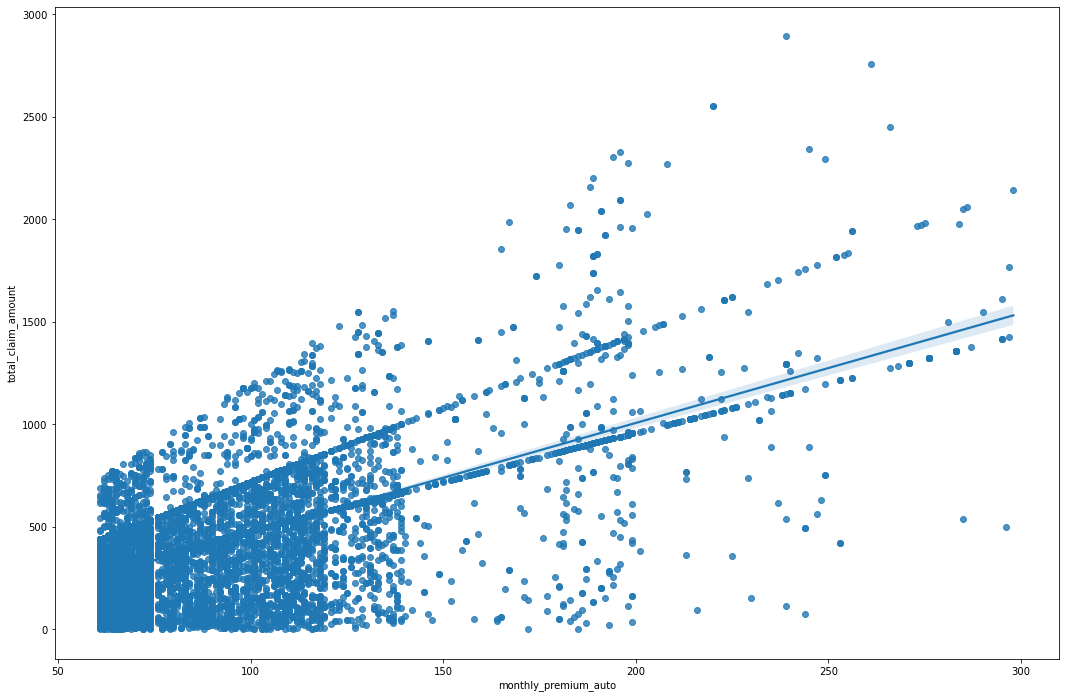

In [44]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 1, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='total_claim_amount', data=file[features_to_analyse], ax=ax)

We can see that the feature `monthly_premium_auto` has a big spread but I cannot tell what insights this information gives us

## C -> Q (Categorical to Quantitative relationship)
We will base this part of the exploration on the C -> Q chapter of the Standford MOOC

Lets get all the categorical features of our dataset and see if we can find some insight in them. For that lets use the previous defined categorical dataframe.

In [45]:
# Preparing table with categorical values and the total claim amount to analysis C -> Q
# Create a list which contains the values of total claim amount
file_total_claim_amount = file['total_claim_amount'].tolist()

# Assign the column to the DataFrame
categorical_target = categorical.assign(total_claim_amount=file_total_claim_amount)
categorical_target

region response  coverage education effective_to_date month  \
0          central       no     basic   college           2/18/11   feb   
1      west region       no     basic   college           1/18/11   jan   
2             east       no     basic  bachelor           2/10/11   feb   
3       north west      yes  extended   college           1/11/11   jan   
4       north west       no   premium  bachelor           1/17/11   jan   
...            ...      ...       ...       ...               ...   ...   
10684      central       no   premium  bachelor           1/19/11   jan   
10685   north west       no     basic   college            1/6/11   jan   
10686      central       no  extended  bachelor            2/6/11   feb   
10687  west region       no   premium   college           2/13/11   feb   
10688      central       no     basic  bachelor            1/8/11   jan   

      employment_status gender location_code marital_status     policy_type  \
0              employed      m      suburban        married  corporate auto   
1            unemployed      f      suburban         single   personal auto   
2              employed      m      suburban         single   personal auto   
3              employed      m      suburban         single  corporate auto   
4         medical leave      f      suburban        married   personal auto   
...                 ...    ...           ...            ...             ...   
10684        unemployed      f      suburban        married   personal auto   
10685          employed      f         urban        married   personal auto   
10686          employed      f         rural        married  corporate auto   
10687          employed      f         urban       divorced   personal auto   
10688        unemployed      m      suburban         single   personal auto   

             policy renew_offer_type sales_channel  vehicle_class  \
0      corporate l3           offer3         agent  four-door car   
1       personal l3           offer4   call center  four-door car   
2       personal l3           offer3   call center            suv   
3      corporate l3           offer2        branch  four-door car   
4       personal l2           offer1        branch  four-door car   
...             ...              ...           ...            ...   
10684   personal l1           offer3           web     luxury car   
10685   personal l3           offer2        branch  four-door car   
10686  corporate l3           offer1           web     luxury suv   
10687   personal l1           offer1        branch            suv   
10688   personal l1           offer4           web            suv   

      vehicle_size  total_claim_amount  
0          medsize                 292  
1          medsize                 744  
2          medsize                 480  
3          medsize                 484  
4          medsize                 707  
...            ...                 ...  
10684      medsize                1214  
10685      medsize                 273  
10686      medsize                 381  
10687      medsize                 618  
10688      medsize                1021  

[10689 rows x 17 columns]

Now lets plot some of them:

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

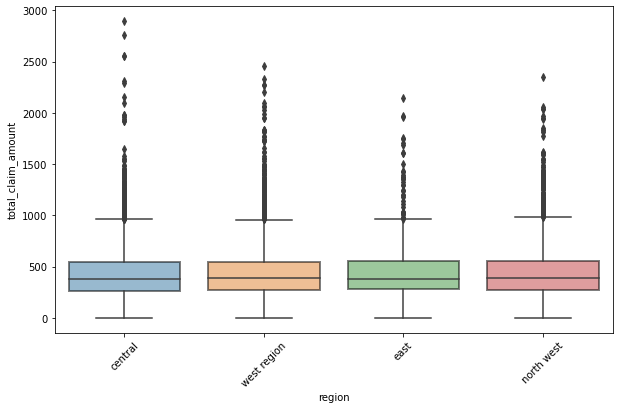

In [46]:
# plot one categorical "region" relatoinship with total claim amount
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='region', y='total_claim_amount', data=categorical_target)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [47]:
# define boxplot fct for c -> q
def boxplots(df,x):
    plt.figure(figsize = (10, 6))
    ax = sns.boxplot(x=x, y='total_claim_amount', data=df)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    return plt.xticks(rotation=45)

In [48]:
categorical_target_features=categorical_target.columns.tolist()
categorical_target_features

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'total_claim_amount']

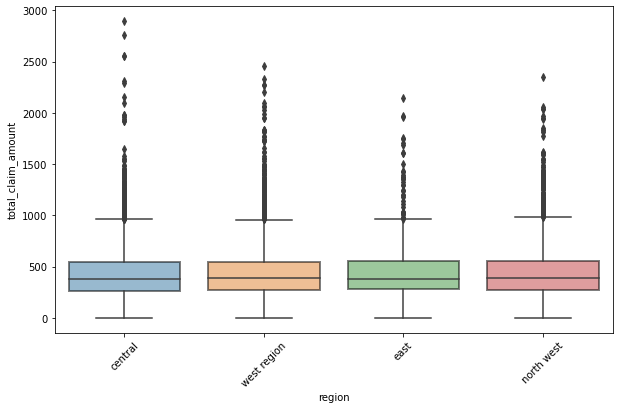

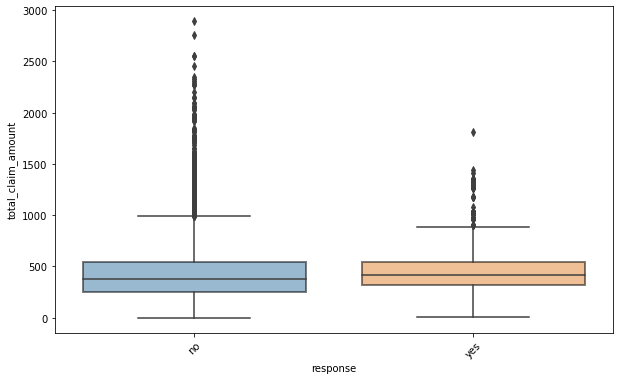

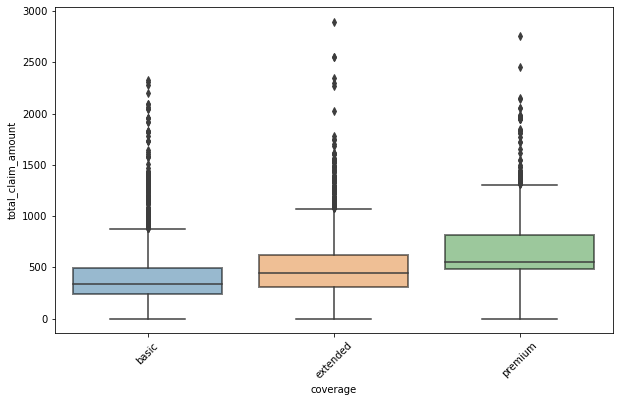

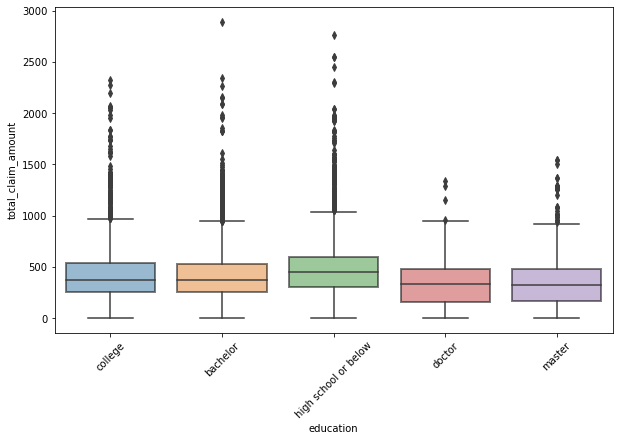

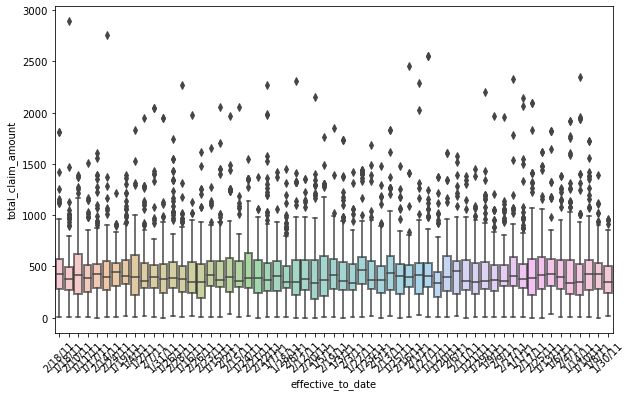

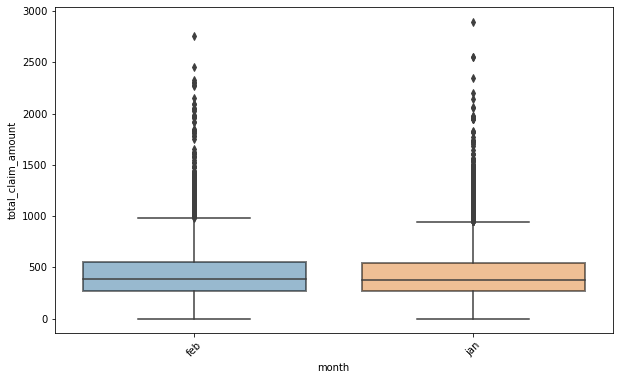

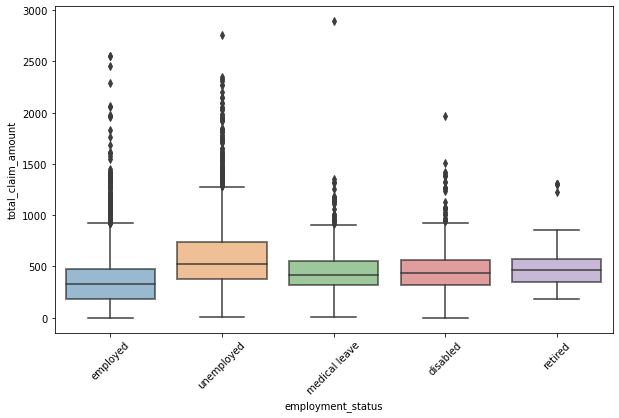

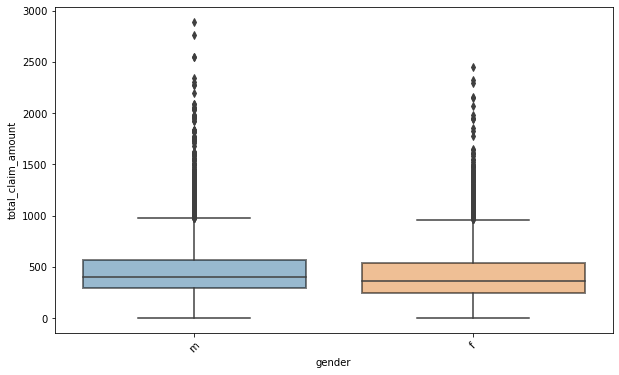

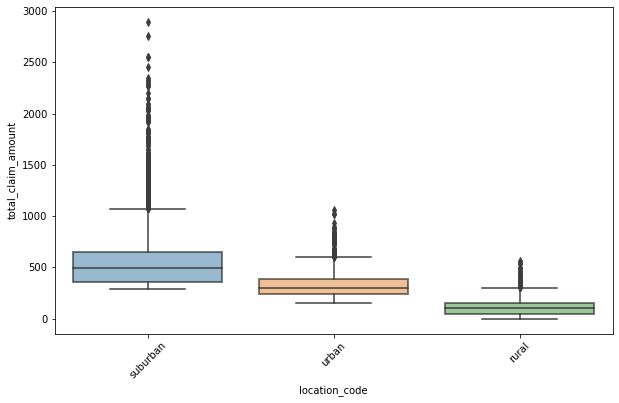

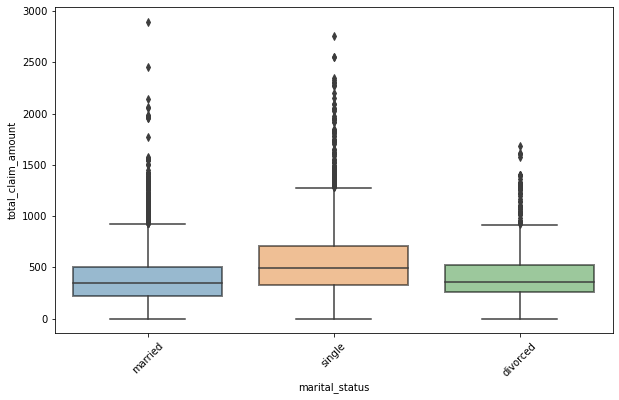

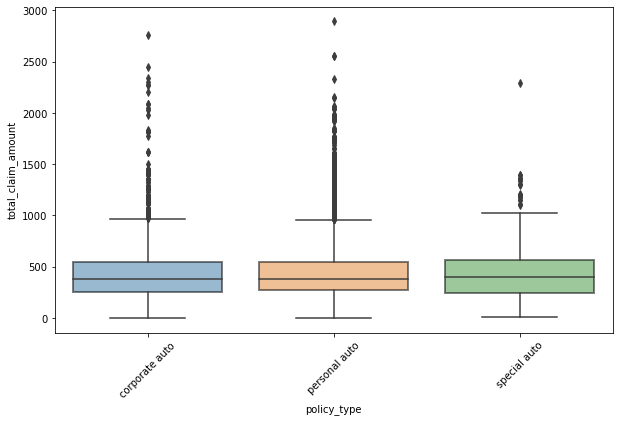

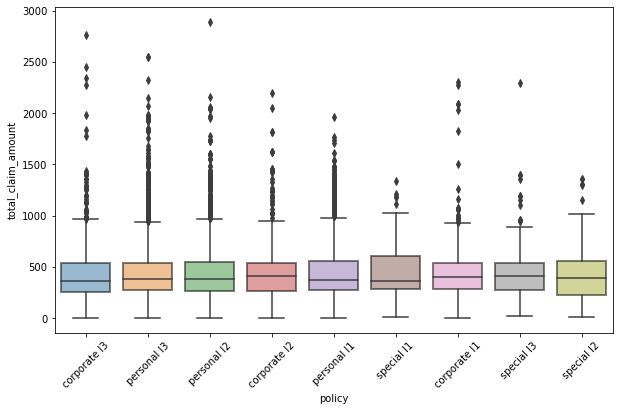

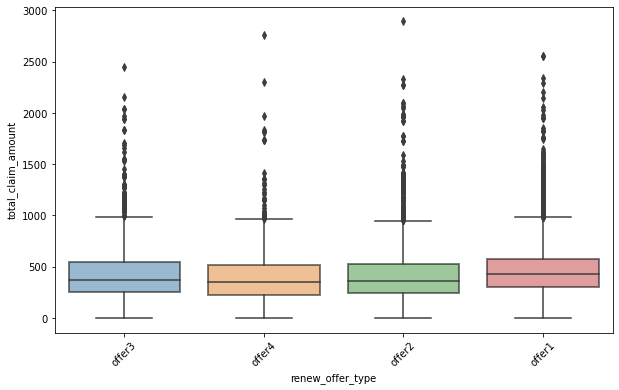

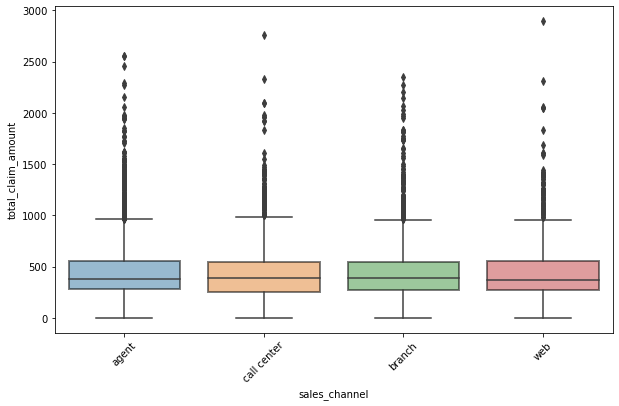

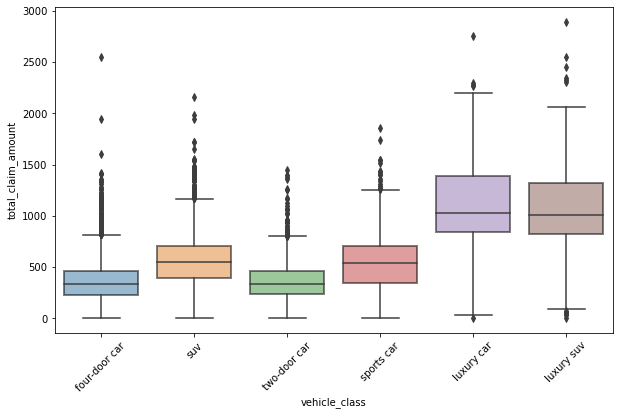

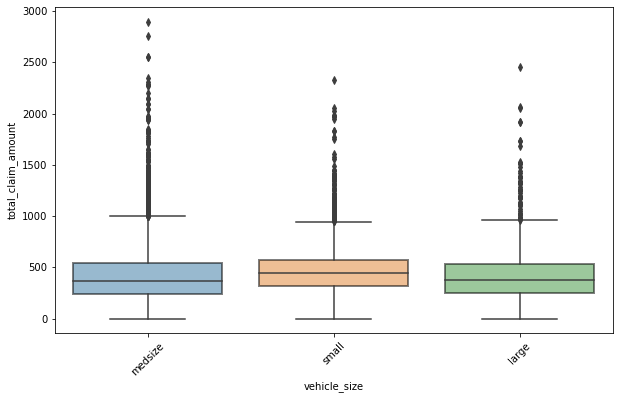

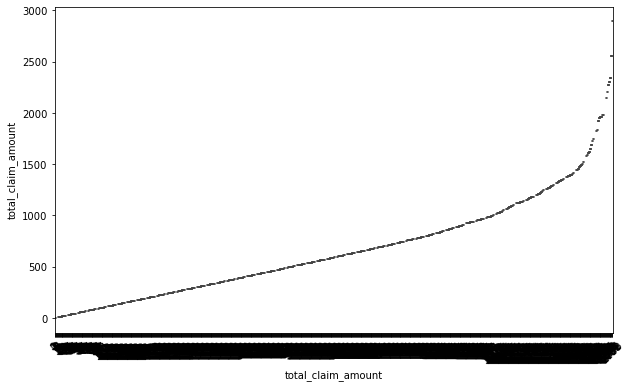

In [49]:
# plot all categorical relatoinships with total claim amount
for f in categorical_target_features:
    boxplots(categorical_target,f)

And finally lets look at their distribution:

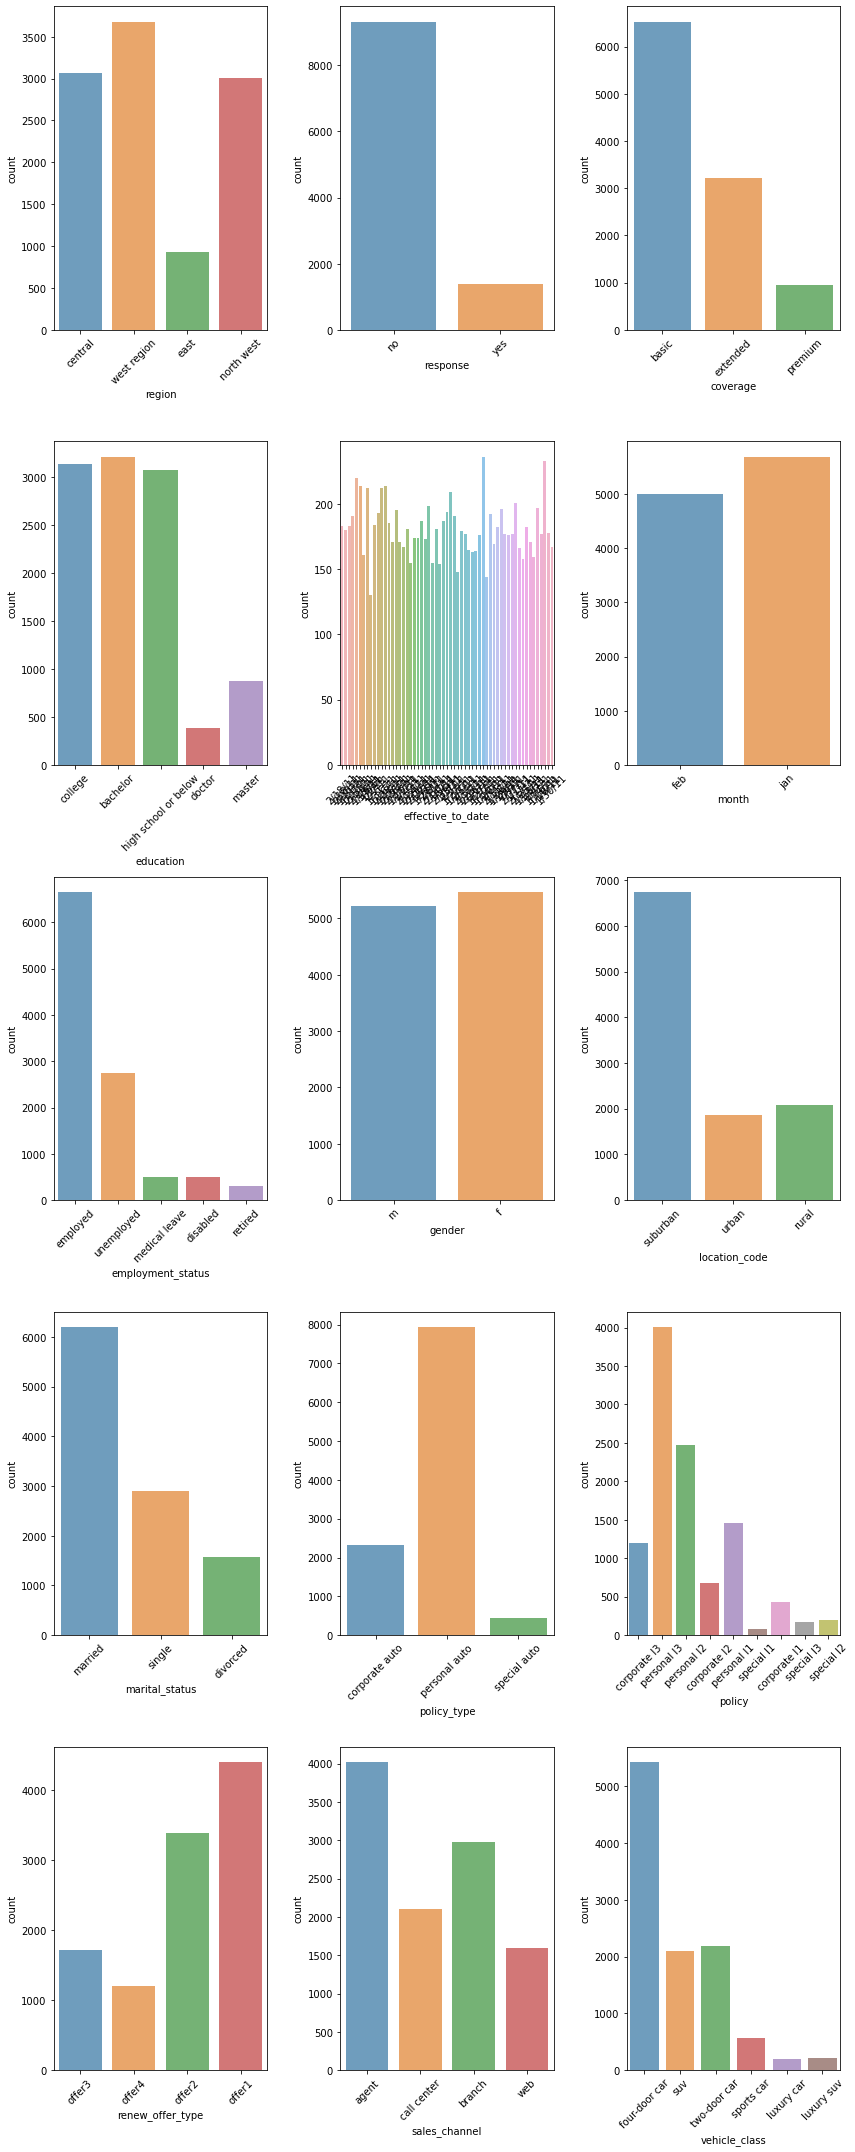

In [50]:
fig, axes = plt.subplots(round(len(categorical.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categorical.columns[i], alpha=0.7, data=categorical, ax=ax)

fig.tight_layout()


**ANALYSIS TAKE-AWAY:** FILL OUT ##############

# Activity 4 (Thursday)
- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
(Optional) Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [51]:
#4.1 Show a plot of the total number of responses.
print(file["response"].value_counts())

no     9316
yes    1373
Name: response, dtype: int64


In [52]:
print(file['response'].describe())

count     10689
unique        2
top          no
freq       9316
Name: response, dtype: object


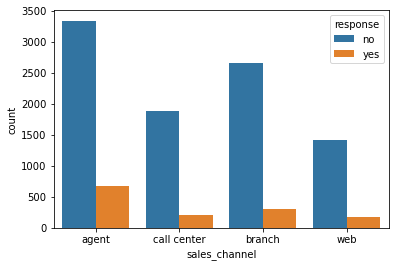

In [57]:
#4.2. Show a plot of the response by the sales channel.
sns.countplot(x=file['sales_channel'], hue = 'response', data=file)

In [53]:
#Create dataframe with response and sales channel
responds_sales_channel = file[['response','sales_channel']]
print(responds_sales_channel)

response sales_channel
0           no         agent
1           no   call center
2           no   call center
3          yes        branch
4           no        branch
...        ...           ...
10684       no           web
10685       no        branch
10686       no           web
10687       no        branch
10688       no           web

[10689 rows x 2 columns]

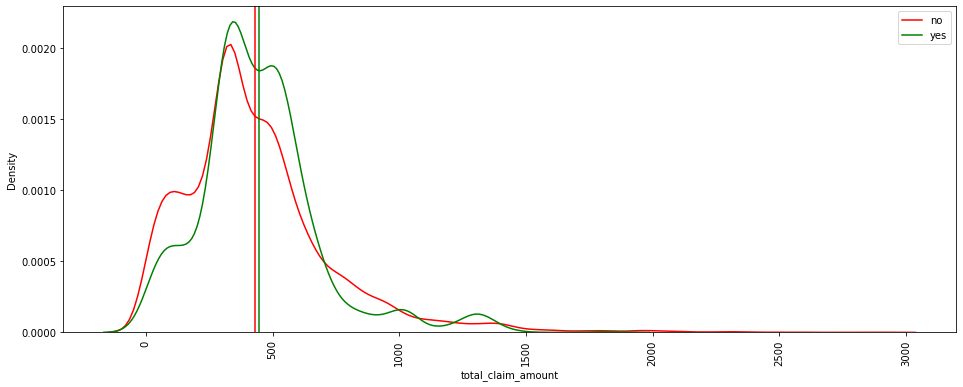

In [61]:
#4.3. Show a plot of the response by the total claim amount.
#kdeplot for response and total claim amount
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(file[file['response']=='no']['total_claim_amount'], color='red', ax=ax, label='no')
sns.kdeplot(file[file['response']=='yes']['total_claim_amount'], color='green', ax=ax, label='yes')

# avg line
plt.axvline(file[file['response']=='no']['total_claim_amount'].mean(), color='red')
plt.axvline(file[file['response']=='yes']['total_claim_amount'].mean(), color='green')

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

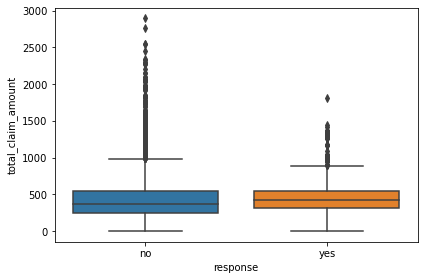

In [60]:
# boxplot of response distributed across total claim amount
sns.boxplot(x=file['response'], y=file['total_claim_amount'], data=file)

plt.tight_layout()
plt.show()

In [ ]:
#4.4 Show a plot of the response by income. (Optional) Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.

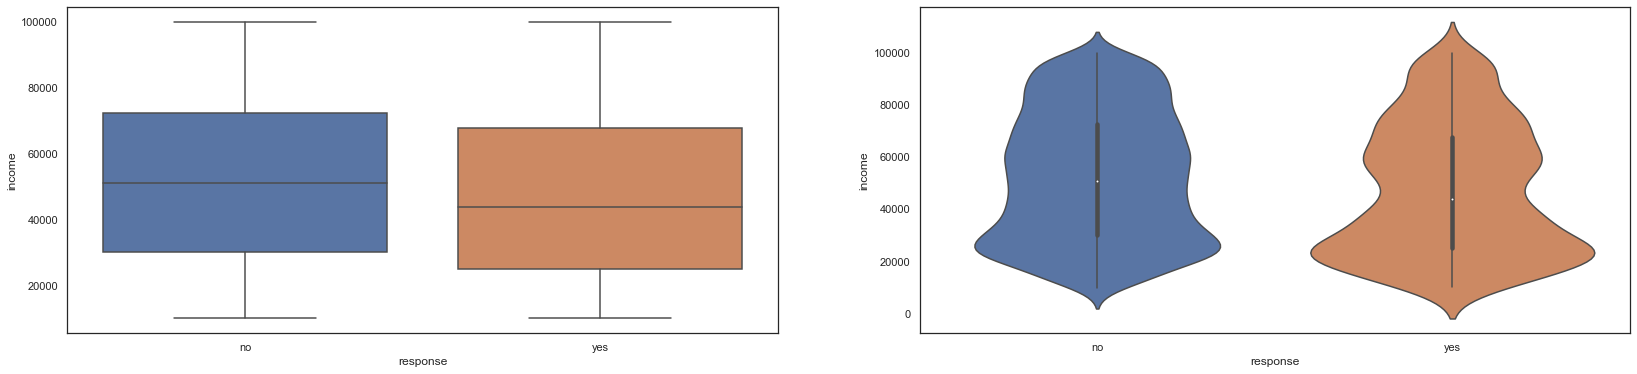

In [68]:
# type 1 : compare with boxplot

fig, ax = plt.subplots(1, 2, figsize=(28, 6))

# boxplot
sns.boxplot(x=file['response'], y=file['income'], data=file, ax=ax[0])

# violinplot
sns.violinplot(x=file['response'], y=file['income'], data=file, ax=ax[1])

plt.show()

In [ ]:
# type 1 : compare with boxplot

#fig, ax = plt.subplots(1, 2, figsize=(28, 6))

# boxplot
#sns.boxplot(x='parental level of education', y='math score', data=data, ax=ax[0])

# violinplot
#sns.violinplot(x='parental level of education', y='math score', data=data, ax=ax[1])

#plt.show()

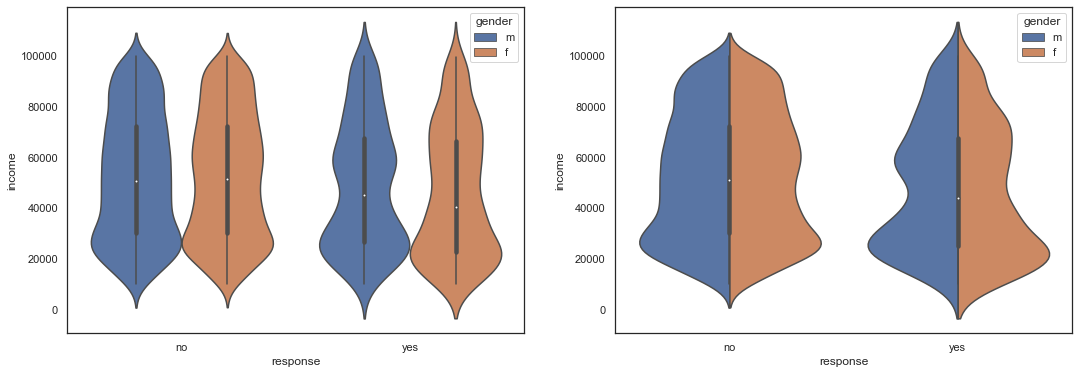

In [66]:
#Violin Plot response by income gender representation next to each other
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.violinplot(x=file['response'], y=file['income'], hue='gender', data=file, ax=ax[0])


#Violin Plot response by income splitted by gender
sns.violinplot(x=file['response'], y=file['income'], hue='gender', data=file, split=True, ax=ax[1])
plt.show()

**Above sns.kdeplots were produced as a reference to:**
Source: https://www.kaggle.com/code/subinium/basic-of-statistical-viz-plotly-seaborn/notebook#Distplot
Credit to: subinium

Subin An
Kaggle Grandmaster

Seoul, Seoul, South Korea

HCI Lab

In [ ]:
# type 2 : hue parameter

#fig, ax = plt.subplots(1, 2, figsize=(18, 6))
#sns.violinplot(x='parental level of education', y='math score', hue='gender', data=data, ax=ax[0])


# type 3 : hue + split
#sns.violinplot(x='parental level of education', y='math score', hue='gender', data=data, split=True, ax=ax[1])
#plt.show()

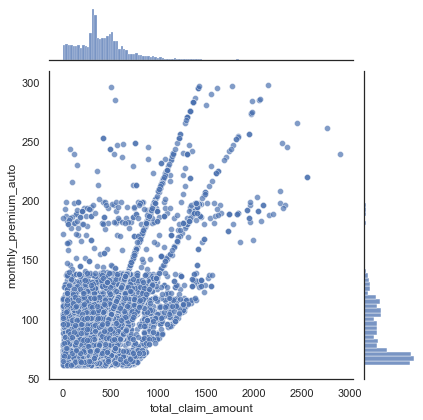

In [65]:
sns.set(style="white", color_codes=True) #suitable theme for jointplot
sns.jointplot(data=file, x=file['total_claim_amount'], y=file['monthly_premium_auto'], alpha=0.7)
plt.show()

In [ ]:
# type 1 : default
sns.set(style="white", color_codes=True) # suitable theme for jointplot
sns.jointplot(data=data, x='writing score', y='reading score', alpha=0.7)
plt.show()

In [82]:
#4.5 Plot the Correlation Heatmap.
categorical_dummies=pd.get_dummies(data=categorical)
categorical_dummies

region_central  region_east  region_north west  region_west region  \
0                   1            0                  0                   0   
1                   0            0                  0                   1   
2                   0            1                  0                   0   
3                   0            0                  1                   0   
4                   0            0                  1                   0   
...               ...          ...                ...                 ...   
10684               1            0                  0                   0   
10685               0            0                  1                   0   
10686               1            0                  0                   0   
10687               0            0                  0                   1   
10688               1            0                  0                   0   

       response_no  response_yes  coverage_basic  coverage_extended  \
0                1             0               1                  0   
1                1             0               1                  0   
2                1             0               1                  0   
3                0             1               0                  1   
4                1             0               0                  0   
...            ...           ...             ...                ...   
10684            1             0               0                  0   
10685            1             0               1                  0   
10686            1             0               0                  1   
10687            1             0               0                  0   
10688            1             0               1                  0   

       coverage_premium  education_bachelor  ...  sales_channel_web  \
0                     0                   0  ...                  0   
1                     0                   0  ...                  0   
2                     0                   1  ...                  0   
3                     0                   0  ...                  0   
4                     1                   1  ...                  0   
...                 ...                 ...  ...                ...   
10684                 1                   1  ...                  1   
10685                 0                   0  ...                  0   
10686                 0                   1  ...                  1   
10687                 1                   0  ...                  0   
10688                 0                   1  ...                  1   

       vehicle_class_four-door car  vehicle_class_luxury car  \
0                                1                         0   
1                                1                         0   
2                                0                         0   
3                                1                         0   
4                                1                         0   
...                            ...                       ...   
10684                            0                         1   
10685                            1                         0   
10686                            0                         0   
10687                            0                         0   
10688                            0                         0   

       vehicle_class_luxury suv  vehicle_class_sports car  vehicle_class_suv  \
0                             0                         0                  0   
1                             0                         0                  0   
2                             0                         0                  1   
3                             0                         0                  0   
4                             0                         0                  0   
...                         ...                       ...                ...   
10684                         0                

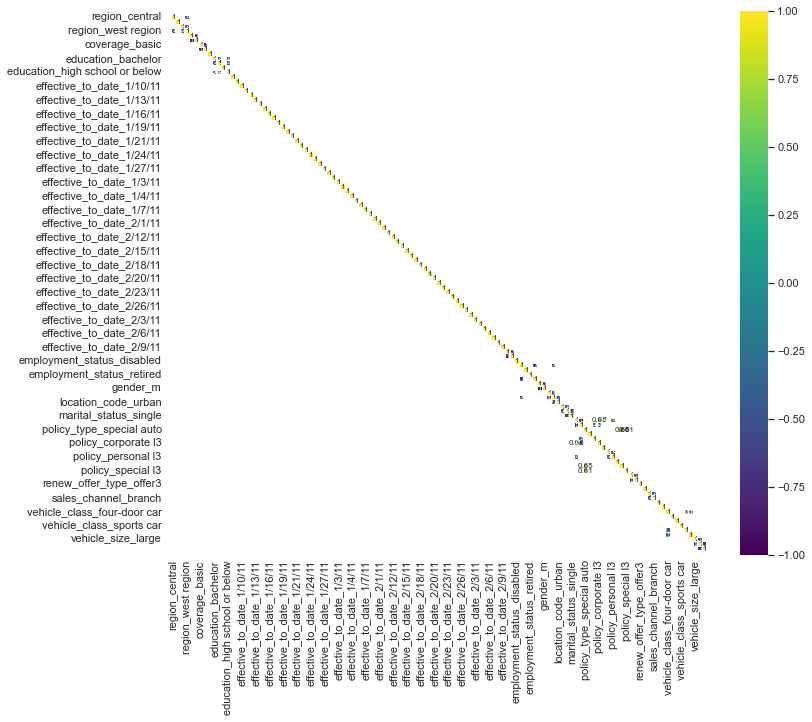

In [83]:
#Heatmap with feature-feature correlations for categories
corr = categorical_dummies.corr() # We already examined total_claim_amount correlations in numerical, now we analyse the categorical correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [90]:
categorical_dummies_corr=categorical_dummies.corr()
categorical_dummies_corr

region_central  region_east  region_north west  \
region_central                    1.000000    -0.195886          -0.397604   
region_east                      -0.195886     1.000000          -0.193203   
region_north west                -0.397604    -0.193203           1.000000   
region_west region               -0.459870    -0.223460          -0.453573   
response_no                      -0.008361    -0.004635           0.000474   
...                                    ...          ...                ...   
vehicle_class_suv                -0.013627     0.001023           0.006070   
vehicle_class_two-door car       -0.000903     0.006669           0.007480   
vehicle_size_large                0.010508     0.002561          -0.004251   
vehicle_size_medsize             -0.010343     0.010718          -0.009832   
vehicle_size_small                0.003841    -0.014412           0.014696   

                            region_west region  response_no  response_yes  \
region_central                       -0.459870    -0.008361      0.008361   
region_east                          -0.223460    -0.004635      0.004635   
region_north west                    -0.453573     0.000474     -0.000474   
region_west region                    1.000000     0.010264     -0.010264   
response_no                           0.010264     1.000000     -1.000000   
...                                        ...          ...           ...   
vehicle_class_suv                     0.006625    -0.029449      0.029449   
vehicle_class_two-door car           -0.010177     0.008086     -0.008086   
vehicle_size_large                   -0.007502    -0.025794      0.025794   
vehicle_size_medsize                  0.012805    -0.012885      0.012885   
vehicle_size_small                   -0.009027     0.034944     -0.034944   

                            coverage_basic  coverage_extended  \
region_central                   -0.009364           0.008528   
region_east                       0.001413           0.000262   
region_north west                 0.004489          -0.004585   
region_west region                0.003831          -0.003936   
response_no                      -0.004657           0.006596   
...                                    ...                ...   
vehicle_class_suv                 0.006098          -0.000391   
vehicle_class_two-door car        0.020738          -0.009800   
vehicle_size_large               -0.000378           0.010347   
vehicle_size_medsize             -0.003358          -0.002643   
vehicle_size_small                0.004186          -0.004961   

                            coverage_premium  education_bachelor  ...  \
region_central                      0.002305           -0.004171  ...   
region_east                        -0.002829           -0.002888  ...   
region_north west                  -0.000308           -0.005095  ...   
region_west region                 -0.000226            0.010510  ...   
response_no                        -0.002629            0.006907  ...   
...                                      ...                 ...  ...   
vehicle_class_suv                  -0.009774            0.001258  ...   
vehicle_class_two-door car         -0.019667            0.024710  ...   
vehicle_size_large                 -0.015938           -0.018011  ...   
vehicle_size_medsize                0.009963            0.013987  ...   
vehicle_size_small                  0.000811           -0.002246  ...   

                            sales_channel_web  vehicle_class_four-door car  \
region_central                      -0.003213                     0.003581   
region_east                         -0.012776                     0.015006   
region_north west                    0.021254                    -0.012020   
region_west region                  -0.009488                    -0.000928   
response_no                          0.023541                     0.018854   
...                                     

### Correlation Categorical
Now we'll try to find which features are strongly correlated with customer lifetime value and with total claim amount. We'll store them in a var called golden_features_list. We'll reuse our categorical dataset to do so.

In [111]:
golden_features_list_cat_no = categorical_dummies_corr[abs(categorical_dummies_corr) > 0.5].sort_values('response_no', axis = 0, ascending = False)
golden_features_list_cat_no
print("There is {} strongly correlated values with response no:\n{}".format(len(golden_features_list_cat_no), golden_features_list_cat_no))

There is 117 strongly correlated values with response no:
                            region_central  region_east  region_north west  \
response_no                            NaN          NaN                NaN   
response_yes                           NaN          NaN                NaN   
region_central                         1.0          NaN                NaN   
region_east                            NaN          1.0                NaN   
region_north west                      NaN          NaN                1.0   
...                                    ...          ...                ...   
vehicle_class_suv                      NaN          NaN                NaN   
vehicle_class_two-door car             NaN          NaN                NaN   
vehicle_size_large                     NaN          NaN                NaN   
vehicle_size_medsize                   NaN          NaN                NaN   
vehicle_size_small                     NaN          NaN                NaN   

     

In [112]:
golden_features_list_cat_yes = categorical_dummies_corr[abs(categorical_dummies_corr) > 0.5].sort_values('response_yes', axis = 0, ascending = False)
golden_features_list_cat_yes
print("There is {} strongly correlated values with responds yes:\n{}".format(len(golden_features_list_cat_yes), golden_features_list_cat_yes))

There is 117 strongly correlated values with responds yes:
                            region_central  region_east  region_north west  \
response_yes                           NaN          NaN                NaN   
response_no                            NaN          NaN                NaN   
region_central                         1.0          NaN                NaN   
region_east                            NaN          1.0                NaN   
region_north west                      NaN          NaN                1.0   
...                                    ...          ...                ...   
vehicle_class_suv                      NaN          NaN                NaN   
vehicle_class_two-door car             NaN          NaN                NaN   
vehicle_size_large                     NaN          NaN                NaN   
vehicle_size_medsize                   NaN          NaN                NaN   
vehicle_size_small                     NaN          NaN                NaN   

    